# 상권 분석 시스템 최종

In [1]:
# 필요한 라이브러리 불러오기
from data_modeling import *
from data_preprocess import *
from data_visualization import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### 데이터 다운로드 주소 : https://drive.google.com/drive/folders/1ltFSBpe-Rc33xMtd4QF-MOamOu-Px1XZ

In [2]:
# 데이터 불러오기 - 상권분석
total = pd.read_csv('./모델링_데이터_최종.csv', encoding = 'cp949').drop('Unnamed: 0', axis = 1)

# 데이터 불러오기 - 상권정보 시각화
df_all = pd.read_csv('./시각화_데이터_최종.csv', encoding = 'cp949').drop('Unnamed: 0', axis = 1)

# 데이터 불러오기 - 상권현황
df_base = pd.read_csv('./상권정보_데이터_최종.csv', encoding = 'cp949').drop('Unnamed: 0', axis = 1)

## 1. 분석 대상 선택
### (1) 자치구 선택  
['중구', '종로구', '용산구', '금천구', '영등포구', '송파구', '강동구', '마포구', '강남구', '노원구', '서대문구', '광진구', '서초구', '구로구', '은평구', '성북구', '동작구', '동대문구', '관악구', '성동구', '강서구', '강북구', '도봉구', '중랑구', '양천구']

In [4]:
# 자치구 선택

location_name_select = '중구'

### (2) 상권 선택

In [5]:
# 선택 가능한 상권 출력

market_name = df_all[df_all['자치구_명'] == location_name_select]
market_code_list = list(market_name['상권_코드'].unique())
market_code_list

available_market_name = []
for code in market_code_list:
    select_market = df_base[df_base['상권_코드'] == code].reset_index(drop = True)
    available_market_name.append(select_market.at[0, '상권_코드_명'])
    
available_market_name

['동대문패션타운 관광특구',
 '명동 남대문 북창동 다동 무교동 관광특구',
 '서울 중구 신당역_2',
 '남대문시장',
 '동평화시장',
 '평화시장',
 '동대문시장_1',
 '제일평화시장',
 '동대문역사문화공원역',
 '명동거리',
 '롯데백화점',
 '서울 중구 을지로3가역_2',
 '서울 중구 충무로역_2',
 '북창동',
 '서울시청',
 '서울 중구 을지로3가역_1',
 '서울 중구 약수역_2',
 '방산종합시장',
 '서울 중구 충무로역_1',
 '시청역_1',
 '서울중앙시장',
 '서울 중구 신당역_1',
 '시청역_2',
 '신중부시장',
 '퇴계로12길',
 '서울 중구 명동역',
 '인현시장',
 '퇴계로56길',
 '동호로10길',
 '장충단로8길',
 '약수시장',
 '난계로11길',
 '퇴계로90길',
 '다산로39길',
 '청구로17길',
 '장충동 족발거리',
 '퇴계로8길',
 '백학시장',
 '동호로15길',
 '명동길',
 '다산로38길',
 '동호로20길',
 '퇴계로18길',
 '다산로33길',
 '다산로36길',
 '삼일대로4길',
 '동호로11길',
 '합동(새벽)시장',
 '퇴계로46길',
 '청평화시장',
 '동호로8길',
 '청구로1길',
 '난계로21길',
 '서울 중구 약수역_1']

In [6]:
# 상권 선택

market_name_select = '명동거리'

### (3) 서비스 업종 선택

In [7]:
# 선택 가능한 서비스 업종 출력

service_name = total[total['상권_코드_명'] == market_name_select].reset_index(drop = True)
service_name_list = list(service_name['서비스_업종_코드_명'].unique())
service_name_list

['일반의류',
 '한식음식점',
 '화장품',
 '슈퍼마켓',
 '신발',
 '분식전문점',
 '커피-음료',
 '가방',
 '일반의원',
 '피부관리실',
 '양식음식점',
 '시계및귀금속',
 '미용실',
 '일식음식점',
 '안경',
 '중식음식점',
 '호프-간이주점',
 '네일숍',
 '의약품',
 '운동/경기용품',
 '반찬가게',
 '치과의원',
 '여관',
 '서적',
 '문구',
 '패스트푸드점',
 '제과점',
 '편의점',
 '한의원',
 '당구장',
 '노래방',
 '화초',
 '치킨전문점',
 '청과상']

In [30]:
# 서비스 업종 선택

service_name_select = '편의점'

## 2. 상권 정보 시각화

In [31]:
market_code = df_base[df_base['상권_코드_명'] == market_name_select].reset_index(drop = True)
market_code = market_code.at[0, '상권_코드']
df = df_all[df_all['상권_코드'] == market_code]

### (1) 유동인구

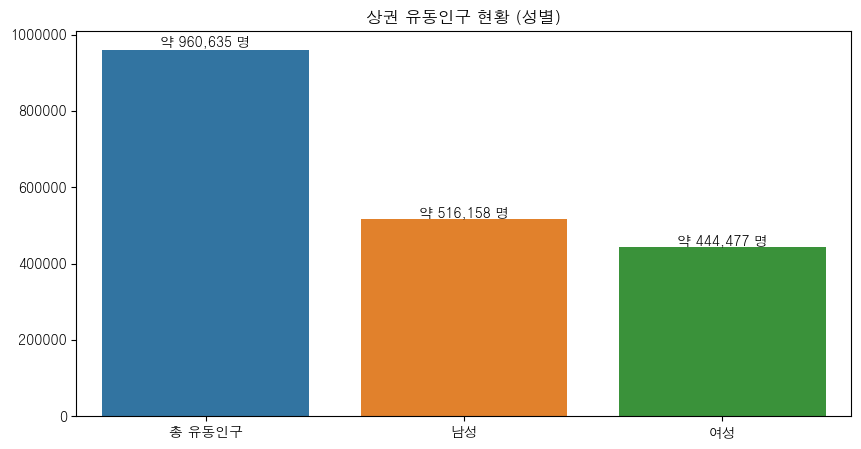

In [32]:
# 총 유동인구 현황

visual_fluid_total(df)

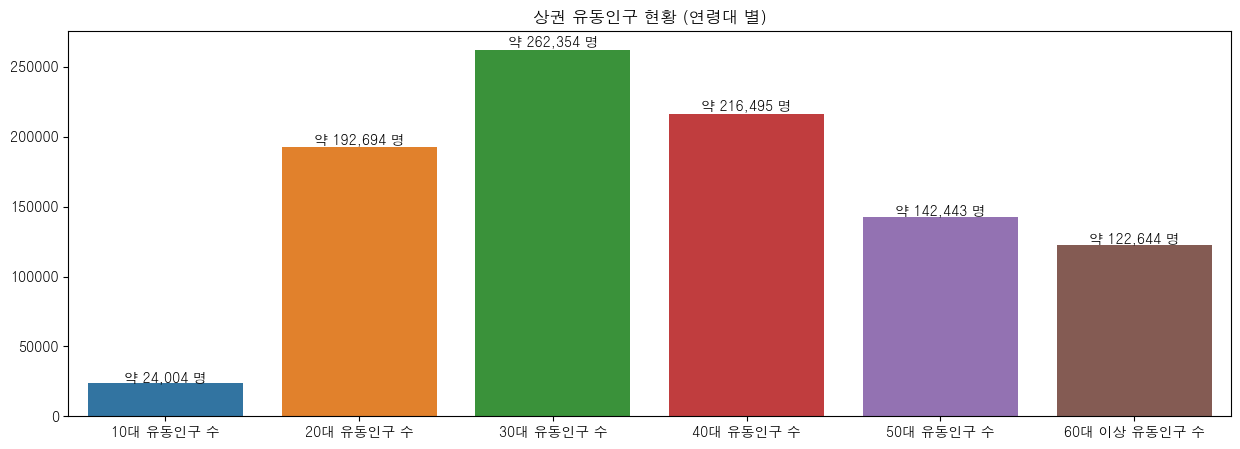

In [33]:
# 연령별 유동인구 현황

visual_fluid_age(df)

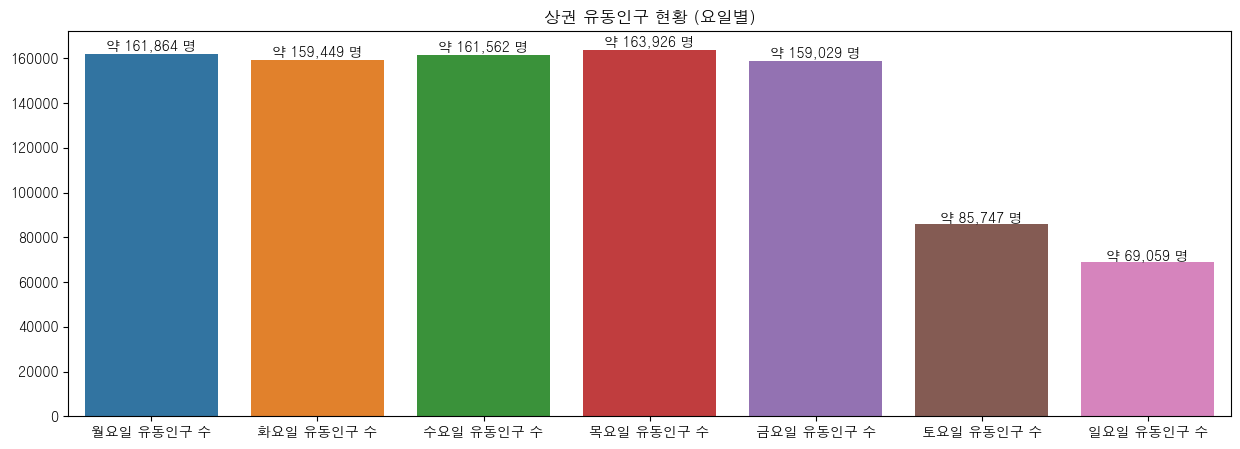

In [34]:
# 요일별 유동인구 현황

visual_fluid_day(df)

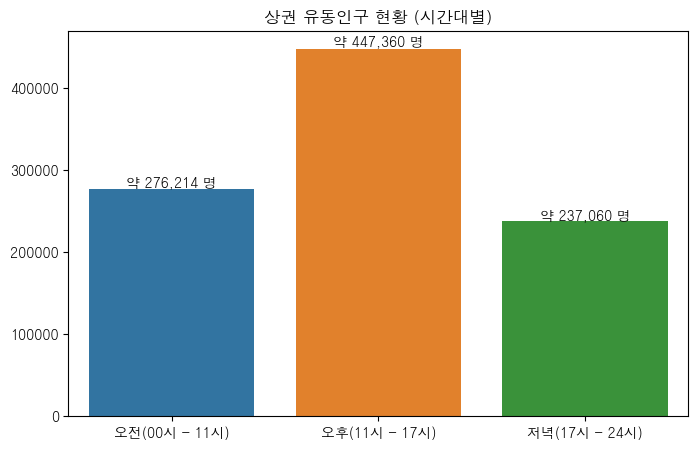

In [35]:
# 시간대별 유동인구 현황

visual_fluid_time(df)

### (2) 집객시설

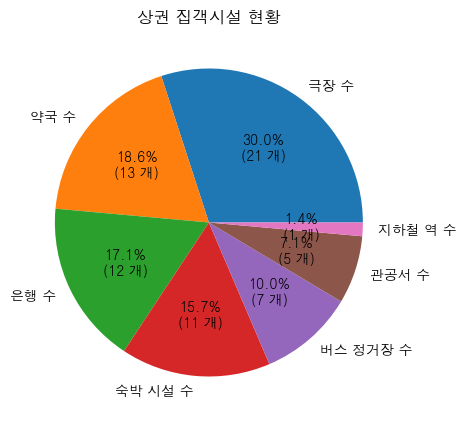

In [36]:
visual_facil(df)

### (3) 직장인구

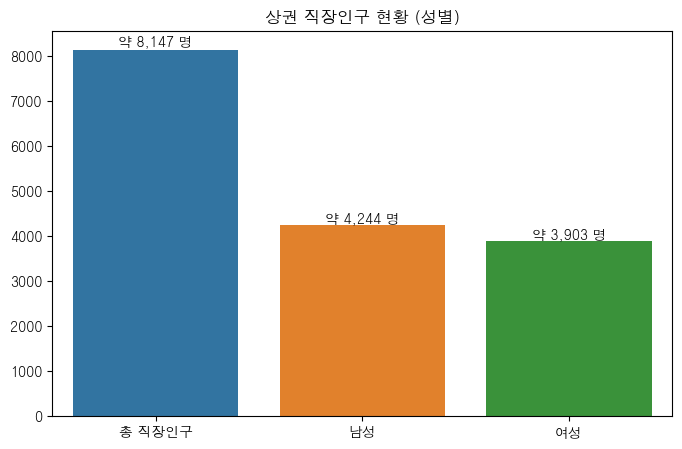

In [37]:
# 총 직장인구 현황

visual_work_total(df)

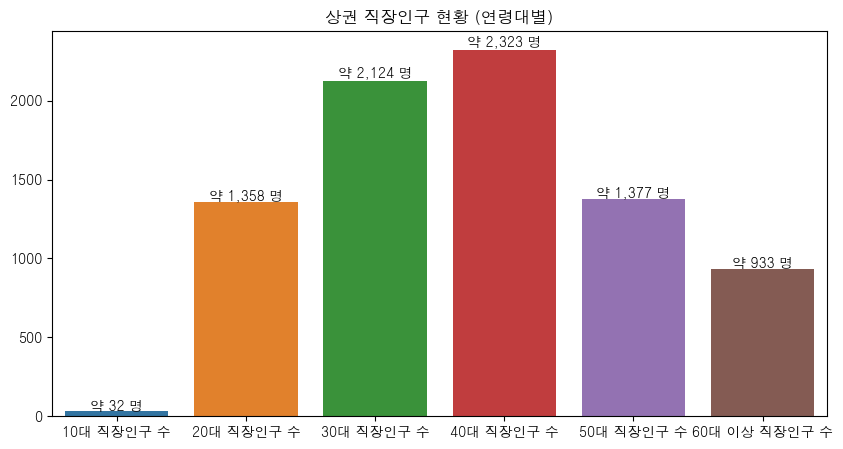

In [38]:
# 연령대별 직장인구 현황

visual_work_age(df)

### (4) 상주인구

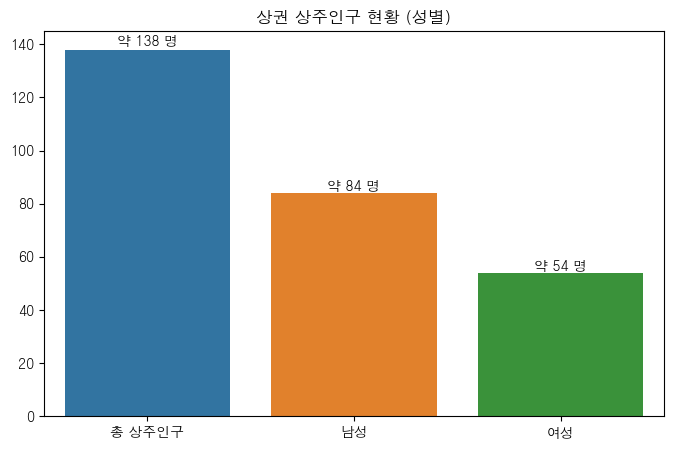

In [39]:
# 총 상주인구 현황
visual_live_total(df)

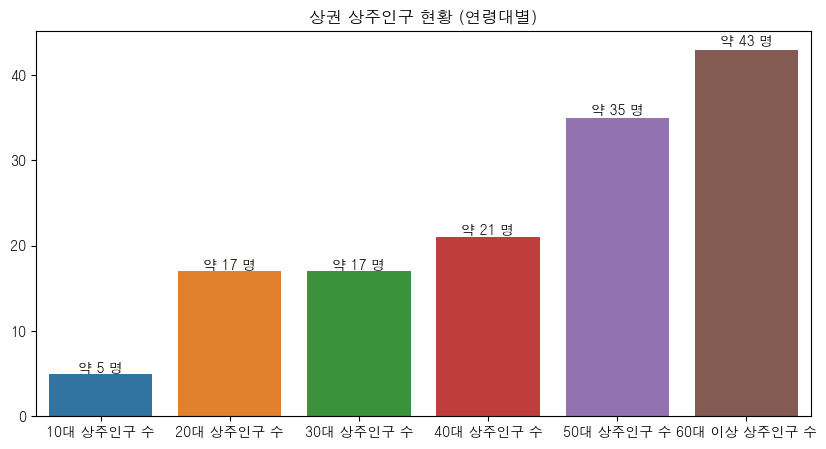

In [40]:
# 연령대별 상주인구 현황

visual_live_age(df)

## 2. 모델링
### (1) 폐업률

In [41]:
# 전처리

market_code = df_base[df_base['상권_코드_명'] == market_name_select].reset_index(drop = True)
market_code = market_code.at[0, '상권_코드']
service_code = total[total['서비스_업종_코드_명'] == service_name_select].reset_index(drop = True)
service_code = service_code.at[0, '서비스_업종_코드']

x_in, x_out, x_predict = data_preprocessing_fail(total, market_code, service_code)

In [42]:
# 모델링

model_fail = modeling(x_in, x_out)

[0]	validation_0-rmse:5.58674
[1]	validation_0-rmse:5.58353
[2]	validation_0-rmse:5.58111
[3]	validation_0-rmse:5.57835
[4]	validation_0-rmse:5.57586
[5]	validation_0-rmse:5.57351
[6]	validation_0-rmse:5.57082
[7]	validation_0-rmse:5.56774
[8]	validation_0-rmse:5.56416
[9]	validation_0-rmse:5.56132
[10]	validation_0-rmse:5.55858
[11]	validation_0-rmse:5.55517
[12]	validation_0-rmse:5.55211
[13]	validation_0-rmse:5.54937
[14]	validation_0-rmse:5.54655
[15]	validation_0-rmse:5.54406
[16]	validation_0-rmse:5.54062
[17]	validation_0-rmse:5.53792
[18]	validation_0-rmse:5.53556
[19]	validation_0-rmse:5.53299
[20]	validation_0-rmse:5.53019
[21]	validation_0-rmse:5.52726
[22]	validation_0-rmse:5.52456
[23]	validation_0-rmse:5.52240
[24]	validation_0-rmse:5.51969
[25]	validation_0-rmse:5.51700
[26]	validation_0-rmse:5.51382
[27]	validation_0-rmse:5.51041
[28]	validation_0-rmse:5.50771
[29]	validation_0-rmse:5.50625
[30]	validation_0-rmse:5.50425
[31]	validation_0-rmse:5.50085
[32]	validation_0-

[260]	validation_0-rmse:4.99359
[261]	validation_0-rmse:4.99141
[262]	validation_0-rmse:4.98956
[263]	validation_0-rmse:4.98748
[264]	validation_0-rmse:4.98533
[265]	validation_0-rmse:4.98410
[266]	validation_0-rmse:4.98232
[267]	validation_0-rmse:4.97983
[268]	validation_0-rmse:4.97817
[269]	validation_0-rmse:4.97704
[270]	validation_0-rmse:4.97582
[271]	validation_0-rmse:4.97415
[272]	validation_0-rmse:4.97294
[273]	validation_0-rmse:4.97102
[274]	validation_0-rmse:4.96930
[275]	validation_0-rmse:4.96852
[276]	validation_0-rmse:4.96639
[277]	validation_0-rmse:4.96476
[278]	validation_0-rmse:4.96273
[279]	validation_0-rmse:4.96182
[280]	validation_0-rmse:4.96006
[281]	validation_0-rmse:4.95903
[282]	validation_0-rmse:4.95739
[283]	validation_0-rmse:4.95566
[284]	validation_0-rmse:4.95476
[285]	validation_0-rmse:4.95306
[286]	validation_0-rmse:4.95187
[287]	validation_0-rmse:4.95087
[288]	validation_0-rmse:4.94886
[289]	validation_0-rmse:4.94620
[290]	validation_0-rmse:4.94350
[291]	va

[517]	validation_0-rmse:4.62961
[518]	validation_0-rmse:4.62828
[519]	validation_0-rmse:4.62730
[520]	validation_0-rmse:4.62600
[521]	validation_0-rmse:4.62467
[522]	validation_0-rmse:4.62404
[523]	validation_0-rmse:4.62297
[524]	validation_0-rmse:4.62166
[525]	validation_0-rmse:4.62047
[526]	validation_0-rmse:4.61907
[527]	validation_0-rmse:4.61795
[528]	validation_0-rmse:4.61666
[529]	validation_0-rmse:4.61429
[530]	validation_0-rmse:4.61303
[531]	validation_0-rmse:4.61172
[532]	validation_0-rmse:4.61063
[533]	validation_0-rmse:4.60886
[534]	validation_0-rmse:4.60773
[535]	validation_0-rmse:4.60675
[536]	validation_0-rmse:4.60552
[537]	validation_0-rmse:4.60421
[538]	validation_0-rmse:4.60474
[539]	validation_0-rmse:4.60394
[540]	validation_0-rmse:4.60262
[541]	validation_0-rmse:4.60134
[542]	validation_0-rmse:4.60010
[543]	validation_0-rmse:4.59864
[544]	validation_0-rmse:4.59756
[545]	validation_0-rmse:4.59633
[546]	validation_0-rmse:4.59513
[547]	validation_0-rmse:4.59386
[548]	va

[774]	validation_0-rmse:4.35595
[775]	validation_0-rmse:4.35498
[776]	validation_0-rmse:4.35399
[777]	validation_0-rmse:4.35307
[778]	validation_0-rmse:4.35208
[779]	validation_0-rmse:4.35142
[780]	validation_0-rmse:4.35042
[781]	validation_0-rmse:4.34994
[782]	validation_0-rmse:4.34897
[783]	validation_0-rmse:4.34797
[784]	validation_0-rmse:4.34717
[785]	validation_0-rmse:4.34607
[786]	validation_0-rmse:4.34568
[787]	validation_0-rmse:4.34490
[788]	validation_0-rmse:4.34397
[789]	validation_0-rmse:4.34204
[790]	validation_0-rmse:4.34114
[791]	validation_0-rmse:4.34040
[792]	validation_0-rmse:4.33948
[793]	validation_0-rmse:4.33833
[794]	validation_0-rmse:4.33767
[795]	validation_0-rmse:4.33702
[796]	validation_0-rmse:4.33601
[797]	validation_0-rmse:4.33506
[798]	validation_0-rmse:4.33448
[799]	validation_0-rmse:4.33332
[800]	validation_0-rmse:4.33249
[801]	validation_0-rmse:4.33297
[802]	validation_0-rmse:4.33207
[803]	validation_0-rmse:4.33123
[804]	validation_0-rmse:4.33034
[805]	va

[1030]	validation_0-rmse:4.16967
[1031]	validation_0-rmse:4.16894
[1032]	validation_0-rmse:4.16782
[1033]	validation_0-rmse:4.16671
[1034]	validation_0-rmse:4.16725
[1035]	validation_0-rmse:4.16674
[1036]	validation_0-rmse:4.16605
[1037]	validation_0-rmse:4.16538
[1038]	validation_0-rmse:4.16487
[1039]	validation_0-rmse:4.16425
[1040]	validation_0-rmse:4.16384
[1041]	validation_0-rmse:4.16413
[1042]	validation_0-rmse:4.16351
[1043]	validation_0-rmse:4.16296
[1044]	validation_0-rmse:4.16270
[1045]	validation_0-rmse:4.16204
[1046]	validation_0-rmse:4.16152
[1047]	validation_0-rmse:4.16120
[1048]	validation_0-rmse:4.16052
[1049]	validation_0-rmse:4.16037
[1050]	validation_0-rmse:4.16013
[1051]	validation_0-rmse:4.15955
[1052]	validation_0-rmse:4.15892
[1053]	validation_0-rmse:4.15811
[1054]	validation_0-rmse:4.15745
[1055]	validation_0-rmse:4.15696
[1056]	validation_0-rmse:4.15643
[1057]	validation_0-rmse:4.15580
[1058]	validation_0-rmse:4.15518
[1059]	validation_0-rmse:4.15494
[1060]	val

[1279]	validation_0-rmse:4.04702
[1280]	validation_0-rmse:4.04692
[1281]	validation_0-rmse:4.04647
[1282]	validation_0-rmse:4.04641
[1283]	validation_0-rmse:4.04594
[1284]	validation_0-rmse:4.04529
[1285]	validation_0-rmse:4.04494
[1286]	validation_0-rmse:4.04468
[1287]	validation_0-rmse:4.04450
[1288]	validation_0-rmse:4.04395
[1289]	validation_0-rmse:4.04347
[1290]	validation_0-rmse:4.04261
[1291]	validation_0-rmse:4.04208
[1292]	validation_0-rmse:4.04189
[1293]	validation_0-rmse:4.04105
[1294]	validation_0-rmse:4.04074
[1295]	validation_0-rmse:4.04055
[1296]	validation_0-rmse:4.03956
[1297]	validation_0-rmse:4.03944
[1298]	validation_0-rmse:4.03921
[1299]	validation_0-rmse:4.03857
[1300]	validation_0-rmse:4.03809
[1301]	validation_0-rmse:4.03795
[1302]	validation_0-rmse:4.03705
[1303]	validation_0-rmse:4.03699
[1304]	validation_0-rmse:4.03696
[1305]	validation_0-rmse:4.03655
[1306]	validation_0-rmse:4.03633
[1307]	validation_0-rmse:4.03675
[1308]	validation_0-rmse:4.03623
[1309]	val

[1528]	validation_0-rmse:3.97083
[1529]	validation_0-rmse:3.97052
[1530]	validation_0-rmse:3.97027
[1531]	validation_0-rmse:3.97006
[1532]	validation_0-rmse:3.96978
[1533]	validation_0-rmse:3.96952
[1534]	validation_0-rmse:3.96894
[1535]	validation_0-rmse:3.96883
[1536]	validation_0-rmse:3.96877
[1537]	validation_0-rmse:3.96843
[1538]	validation_0-rmse:3.96791
[1539]	validation_0-rmse:3.96790
[1540]	validation_0-rmse:3.96787
[1541]	validation_0-rmse:3.96759
[1542]	validation_0-rmse:3.96725
[1543]	validation_0-rmse:3.96711
[1544]	validation_0-rmse:3.96710
[1545]	validation_0-rmse:3.96630
[1546]	validation_0-rmse:3.96603
[1547]	validation_0-rmse:3.96585
[1548]	validation_0-rmse:3.96631
[1549]	validation_0-rmse:3.96626
[1550]	validation_0-rmse:3.96519
[1551]	validation_0-rmse:3.96520
[1552]	validation_0-rmse:3.96450
[1553]	validation_0-rmse:3.96462
[1554]	validation_0-rmse:3.96434
[1555]	validation_0-rmse:3.96327
[1556]	validation_0-rmse:3.96304
[1557]	validation_0-rmse:3.96271
[1558]	val

[1777]	validation_0-rmse:3.91332
[1778]	validation_0-rmse:3.91287
[1779]	validation_0-rmse:3.91263
[1780]	validation_0-rmse:3.91238
[1781]	validation_0-rmse:3.91229
[1782]	validation_0-rmse:3.91211
[1783]	validation_0-rmse:3.91202
[1784]	validation_0-rmse:3.91215
[1785]	validation_0-rmse:3.91201
[1786]	validation_0-rmse:3.91194
[1787]	validation_0-rmse:3.91191
[1788]	validation_0-rmse:3.91227
[1789]	validation_0-rmse:3.91263
[1790]	validation_0-rmse:3.91224
[1791]	validation_0-rmse:3.91209
[1792]	validation_0-rmse:3.91186
[1793]	validation_0-rmse:3.91160
[1794]	validation_0-rmse:3.91144
[1795]	validation_0-rmse:3.91085
[1796]	validation_0-rmse:3.91059
[1797]	validation_0-rmse:3.91046
[1798]	validation_0-rmse:3.91026
[1799]	validation_0-rmse:3.90981
[1800]	validation_0-rmse:3.90951
[1801]	validation_0-rmse:3.90928
[1802]	validation_0-rmse:3.90916
[1803]	validation_0-rmse:3.90871
[1804]	validation_0-rmse:3.90833
[1805]	validation_0-rmse:3.90861
[1806]	validation_0-rmse:3.90825
[1807]	val

[2026]	validation_0-rmse:3.88384
[2027]	validation_0-rmse:3.88388
[2028]	validation_0-rmse:3.88379
[2029]	validation_0-rmse:3.88418
[2030]	validation_0-rmse:3.88445
[2031]	validation_0-rmse:3.88448
[2032]	validation_0-rmse:3.88421
[2033]	validation_0-rmse:3.88392
[2034]	validation_0-rmse:3.88377
[2035]	validation_0-rmse:3.88327
[2036]	validation_0-rmse:3.88287
[2037]	validation_0-rmse:3.88322
[2038]	validation_0-rmse:3.88311
[2039]	validation_0-rmse:3.88314
[2040]	validation_0-rmse:3.88333
[2041]	validation_0-rmse:3.88336
[2042]	validation_0-rmse:3.88315
[2043]	validation_0-rmse:3.88287
[2044]	validation_0-rmse:3.88246
[2045]	validation_0-rmse:3.88228
[2046]	validation_0-rmse:3.88256
[2047]	validation_0-rmse:3.88260
[2048]	validation_0-rmse:3.88256
[2049]	validation_0-rmse:3.88221
[2050]	validation_0-rmse:3.88225
[2051]	validation_0-rmse:3.88226
[2052]	validation_0-rmse:3.88227
[2053]	validation_0-rmse:3.88214
[2054]	validation_0-rmse:3.88217
[2055]	validation_0-rmse:3.88194
[2056]	val

[2275]	validation_0-rmse:3.86450
[2276]	validation_0-rmse:3.86455
[2277]	validation_0-rmse:3.86429
[2278]	validation_0-rmse:3.86406
[2279]	validation_0-rmse:3.86369
[2280]	validation_0-rmse:3.86400
[2281]	validation_0-rmse:3.86375
[2282]	validation_0-rmse:3.86326
[2283]	validation_0-rmse:3.86343
[2284]	validation_0-rmse:3.86310
[2285]	validation_0-rmse:3.86315
[2286]	validation_0-rmse:3.86319
[2287]	validation_0-rmse:3.86270
[2288]	validation_0-rmse:3.86246
[2289]	validation_0-rmse:3.86220
[2290]	validation_0-rmse:3.86192
[2291]	validation_0-rmse:3.86143
[2292]	validation_0-rmse:3.86154
[2293]	validation_0-rmse:3.86128
[2294]	validation_0-rmse:3.86080
[2295]	validation_0-rmse:3.86071
[2296]	validation_0-rmse:3.86050
[2297]	validation_0-rmse:3.86060
[2298]	validation_0-rmse:3.86084
[2299]	validation_0-rmse:3.86054
[2300]	validation_0-rmse:3.86046
[2301]	validation_0-rmse:3.86051
[2302]	validation_0-rmse:3.86039
[2303]	validation_0-rmse:3.86054
[2304]	validation_0-rmse:3.86013
[2305]	val

[2524]	validation_0-rmse:3.84343
[2525]	validation_0-rmse:3.84368
[2526]	validation_0-rmse:3.84336
[2527]	validation_0-rmse:3.84336
[2528]	validation_0-rmse:3.84335
[2529]	validation_0-rmse:3.84309
[2530]	validation_0-rmse:3.84303
[2531]	validation_0-rmse:3.84303
[2532]	validation_0-rmse:3.84262
[2533]	validation_0-rmse:3.84279
[2534]	validation_0-rmse:3.84275
[2535]	validation_0-rmse:3.84272
[2536]	validation_0-rmse:3.84248
[2537]	validation_0-rmse:3.84212
[2538]	validation_0-rmse:3.84173
[2539]	validation_0-rmse:3.84170
[2540]	validation_0-rmse:3.84174
[2541]	validation_0-rmse:3.84199
[2542]	validation_0-rmse:3.84190
[2543]	validation_0-rmse:3.84172
[2544]	validation_0-rmse:3.84169
[2545]	validation_0-rmse:3.84160
[2546]	validation_0-rmse:3.84156
[2547]	validation_0-rmse:3.84131
[2548]	validation_0-rmse:3.84108
[2549]	validation_0-rmse:3.84058
[2550]	validation_0-rmse:3.84027
[2551]	validation_0-rmse:3.83989
[2552]	validation_0-rmse:3.83963
[2553]	validation_0-rmse:3.83960
[2554]	val

[2773]	validation_0-rmse:3.82479
[2774]	validation_0-rmse:3.82479
[2775]	validation_0-rmse:3.82446
[2776]	validation_0-rmse:3.82462
[2777]	validation_0-rmse:3.82461
[2778]	validation_0-rmse:3.82455
[2779]	validation_0-rmse:3.82424
[2780]	validation_0-rmse:3.82426
[2781]	validation_0-rmse:3.82434
[2782]	validation_0-rmse:3.82417
[2783]	validation_0-rmse:3.82425
[2784]	validation_0-rmse:3.82382
[2785]	validation_0-rmse:3.82391
[2786]	validation_0-rmse:3.82394
[2787]	validation_0-rmse:3.82395
[2788]	validation_0-rmse:3.82393
[2789]	validation_0-rmse:3.82388
[2790]	validation_0-rmse:3.82375
[2791]	validation_0-rmse:3.82370
[2792]	validation_0-rmse:3.82370
[2793]	validation_0-rmse:3.82367
[2794]	validation_0-rmse:3.82364
[2795]	validation_0-rmse:3.82352
[2796]	validation_0-rmse:3.82341
[2797]	validation_0-rmse:3.82342
[2798]	validation_0-rmse:3.82329
[2799]	validation_0-rmse:3.82333
[2800]	validation_0-rmse:3.82331
[2801]	validation_0-rmse:3.82328
[2802]	validation_0-rmse:3.82356
[2803]	val

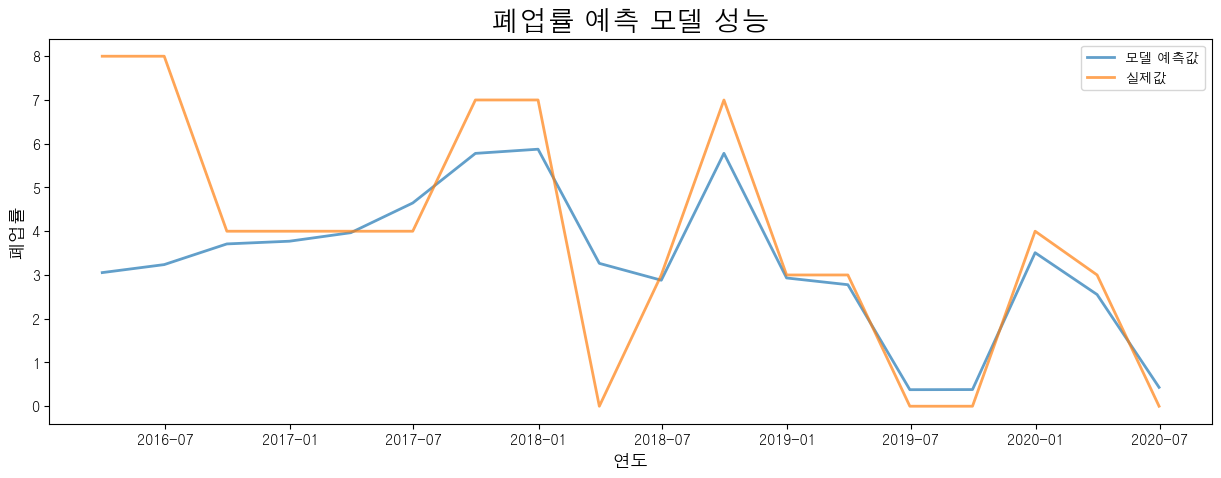

In [43]:
visual_model(model_fail, x_in, x_out)

In [44]:
# 2020-3 분기 폐업률 예측
predict = model_fail.predict(x_predict)
print("2020-3 '{}' 상권의 '{}' 업종 예상 폐업률은 {:3.2f}% 입니다.".format(market_name_select, service_name_select, predict[0]))

2020-3 '명동거리' 상권의 '편의점' 업종 예상 폐업률은 1.19% 입니다.


### (2) 창업 전략 분석

In [45]:
# 전처리

x_in_1, x_out_1, x_predict_1 = data_preprocessing_survive(total, market_code, service_code, 'gender')
x_in_2, x_out_2, x_predict_2 = data_preprocessing_survive(total, market_code, service_code, 'age')
x_in_3, x_out_3, x_predict_3 = data_preprocessing_survive(total, market_code, service_code, 'day')
x_in_4, x_out_4, x_predict_4 = data_preprocessing_survive(total, market_code, service_code, 'time')

In [46]:
# 모델링

# 모델링

model_survive_1 = modeling(x_in_1, x_out_1)
model_survive_2 = modeling(x_in_2, x_out_2)
model_survive_3 = modeling(x_in_3, x_out_3)
model_survive_4 = modeling(x_in_4, x_out_4)

[0]	validation_0-rmse:95.71242
[1]	validation_0-rmse:95.62466
[2]	validation_0-rmse:95.53577
[3]	validation_0-rmse:95.44774
[4]	validation_0-rmse:95.35969
[5]	validation_0-rmse:95.27389
[6]	validation_0-rmse:95.18624
[7]	validation_0-rmse:95.09764
[8]	validation_0-rmse:95.01031
[9]	validation_0-rmse:94.92393
[10]	validation_0-rmse:94.83611
[11]	validation_0-rmse:94.75021
[12]	validation_0-rmse:94.66235
[13]	validation_0-rmse:94.57661
[14]	validation_0-rmse:94.48870
[15]	validation_0-rmse:94.40027
[16]	validation_0-rmse:94.31694
[17]	validation_0-rmse:94.23282
[18]	validation_0-rmse:94.14672
[19]	validation_0-rmse:94.06072
[20]	validation_0-rmse:93.97480
[21]	validation_0-rmse:93.88745
[22]	validation_0-rmse:93.80243
[23]	validation_0-rmse:93.71590
[24]	validation_0-rmse:93.62948
[25]	validation_0-rmse:93.54370
[26]	validation_0-rmse:93.45670
[27]	validation_0-rmse:93.37072
[28]	validation_0-rmse:93.28726
[29]	validation_0-rmse:93.20101
[30]	validation_0-rmse:93.11456
[31]	validation_0-

[252]	validation_0-rmse:75.99940
[253]	validation_0-rmse:75.93072
[254]	validation_0-rmse:75.86053
[255]	validation_0-rmse:75.79063
[256]	validation_0-rmse:75.72157
[257]	validation_0-rmse:75.65351
[258]	validation_0-rmse:75.58478
[259]	validation_0-rmse:75.51517
[260]	validation_0-rmse:75.44619
[261]	validation_0-rmse:75.37655
[262]	validation_0-rmse:75.30763
[263]	validation_0-rmse:75.23805
[264]	validation_0-rmse:75.16866
[265]	validation_0-rmse:75.09925
[266]	validation_0-rmse:75.02979
[267]	validation_0-rmse:74.96096
[268]	validation_0-rmse:74.89227
[269]	validation_0-rmse:74.82364
[270]	validation_0-rmse:74.75444
[271]	validation_0-rmse:74.68508
[272]	validation_0-rmse:74.61759
[273]	validation_0-rmse:74.54999
[274]	validation_0-rmse:74.48048
[275]	validation_0-rmse:74.41185
[276]	validation_0-rmse:74.34464
[277]	validation_0-rmse:74.27613
[278]	validation_0-rmse:74.20830
[279]	validation_0-rmse:74.13940
[280]	validation_0-rmse:74.07186
[281]	validation_0-rmse:74.00522
[282]	vali

[501]	validation_0-rmse:60.52882
[502]	validation_0-rmse:60.47388
[503]	validation_0-rmse:60.41779
[504]	validation_0-rmse:60.36315
[505]	validation_0-rmse:60.30938
[506]	validation_0-rmse:60.25325
[507]	validation_0-rmse:60.19771
[508]	validation_0-rmse:60.14278
[509]	validation_0-rmse:60.08782
[510]	validation_0-rmse:60.03260
[511]	validation_0-rmse:59.97781
[512]	validation_0-rmse:59.92306
[513]	validation_0-rmse:59.86756
[514]	validation_0-rmse:59.81331
[515]	validation_0-rmse:59.75876
[516]	validation_0-rmse:59.70316
[517]	validation_0-rmse:59.64832
[518]	validation_0-rmse:59.59281
[519]	validation_0-rmse:59.53938
[520]	validation_0-rmse:59.48504
[521]	validation_0-rmse:59.43143
[522]	validation_0-rmse:59.37673
[523]	validation_0-rmse:59.32210
[524]	validation_0-rmse:59.26783
[525]	validation_0-rmse:59.21442
[526]	validation_0-rmse:59.15978
[527]	validation_0-rmse:59.10693
[528]	validation_0-rmse:59.05323
[529]	validation_0-rmse:58.99943
[530]	validation_0-rmse:58.94535
[531]	vali

[750]	validation_0-rmse:48.25665
[751]	validation_0-rmse:48.21184
[752]	validation_0-rmse:48.16735
[753]	validation_0-rmse:48.12451
[754]	validation_0-rmse:48.08081
[755]	validation_0-rmse:48.03759
[756]	validation_0-rmse:47.99343
[757]	validation_0-rmse:47.94913
[758]	validation_0-rmse:47.90581
[759]	validation_0-rmse:47.86189
[760]	validation_0-rmse:47.81745
[761]	validation_0-rmse:47.77401
[762]	validation_0-rmse:47.73194
[763]	validation_0-rmse:47.68795
[764]	validation_0-rmse:47.64546
[765]	validation_0-rmse:47.60142
[766]	validation_0-rmse:47.55827
[767]	validation_0-rmse:47.51438
[768]	validation_0-rmse:47.47100
[769]	validation_0-rmse:47.42837
[770]	validation_0-rmse:47.38612
[771]	validation_0-rmse:47.34266
[772]	validation_0-rmse:47.29919
[773]	validation_0-rmse:47.25730
[774]	validation_0-rmse:47.21409
[775]	validation_0-rmse:47.17154
[776]	validation_0-rmse:47.12929
[777]	validation_0-rmse:47.08628
[778]	validation_0-rmse:47.04418
[779]	validation_0-rmse:47.00185
[780]	vali

[999]	validation_0-rmse:38.51132
[1000]	validation_0-rmse:38.47665
[1001]	validation_0-rmse:38.44179
[1002]	validation_0-rmse:38.40719
[1003]	validation_0-rmse:38.37232
[1004]	validation_0-rmse:38.33939
[1005]	validation_0-rmse:38.30426
[1006]	validation_0-rmse:38.26932
[1007]	validation_0-rmse:38.23651
[1008]	validation_0-rmse:38.20203
[1009]	validation_0-rmse:38.16675
[1010]	validation_0-rmse:38.13133
[1011]	validation_0-rmse:38.09845
[1012]	validation_0-rmse:38.06417
[1013]	validation_0-rmse:38.02992
[1014]	validation_0-rmse:37.99556
[1015]	validation_0-rmse:37.96075
[1016]	validation_0-rmse:37.92592
[1017]	validation_0-rmse:37.89271
[1018]	validation_0-rmse:37.85870
[1019]	validation_0-rmse:37.82441
[1020]	validation_0-rmse:37.79037
[1021]	validation_0-rmse:37.75588
[1022]	validation_0-rmse:37.72162
[1023]	validation_0-rmse:37.68794
[1024]	validation_0-rmse:37.65369
[1025]	validation_0-rmse:37.61919
[1026]	validation_0-rmse:37.58536
[1027]	validation_0-rmse:37.55222
[1028]	validati

[1240]	validation_0-rmse:31.02000
[1241]	validation_0-rmse:30.99255
[1242]	validation_0-rmse:30.96445
[1243]	validation_0-rmse:30.93619
[1244]	validation_0-rmse:30.90908
[1245]	validation_0-rmse:30.88245
[1246]	validation_0-rmse:30.85418
[1247]	validation_0-rmse:30.82641
[1248]	validation_0-rmse:30.79916
[1249]	validation_0-rmse:30.77263
[1250]	validation_0-rmse:30.74542
[1251]	validation_0-rmse:30.71820
[1252]	validation_0-rmse:30.69113
[1253]	validation_0-rmse:30.66434
[1254]	validation_0-rmse:30.63713
[1255]	validation_0-rmse:30.60992
[1256]	validation_0-rmse:30.58221
[1257]	validation_0-rmse:30.55498
[1258]	validation_0-rmse:30.52814
[1259]	validation_0-rmse:30.50059
[1260]	validation_0-rmse:30.47321
[1261]	validation_0-rmse:30.44555
[1262]	validation_0-rmse:30.41989
[1263]	validation_0-rmse:30.39311
[1264]	validation_0-rmse:30.36772
[1265]	validation_0-rmse:30.34073
[1266]	validation_0-rmse:30.31319
[1267]	validation_0-rmse:30.28716
[1268]	validation_0-rmse:30.26026
[1269]	validat

[1481]	validation_0-rmse:25.05227
[1482]	validation_0-rmse:25.03012
[1483]	validation_0-rmse:25.00778
[1484]	validation_0-rmse:24.98539
[1485]	validation_0-rmse:24.96330
[1486]	validation_0-rmse:24.94124
[1487]	validation_0-rmse:24.91985
[1488]	validation_0-rmse:24.89795
[1489]	validation_0-rmse:24.87623
[1490]	validation_0-rmse:24.85422
[1491]	validation_0-rmse:24.83267
[1492]	validation_0-rmse:24.81130
[1493]	validation_0-rmse:24.78963
[1494]	validation_0-rmse:24.76735
[1495]	validation_0-rmse:24.74540
[1496]	validation_0-rmse:24.72317
[1497]	validation_0-rmse:24.70106
[1498]	validation_0-rmse:24.67898
[1499]	validation_0-rmse:24.65663
[1500]	validation_0-rmse:24.63512
[1501]	validation_0-rmse:24.61443
[1502]	validation_0-rmse:24.59276
[1503]	validation_0-rmse:24.57184
[1504]	validation_0-rmse:24.55054
[1505]	validation_0-rmse:24.52954
[1506]	validation_0-rmse:24.50960
[1507]	validation_0-rmse:24.48812
[1508]	validation_0-rmse:24.46658
[1509]	validation_0-rmse:24.44486
[1510]	validat

[1722]	validation_0-rmse:20.28941
[1723]	validation_0-rmse:20.27136
[1724]	validation_0-rmse:20.25356
[1725]	validation_0-rmse:20.23624
[1726]	validation_0-rmse:20.21845
[1727]	validation_0-rmse:20.20065
[1728]	validation_0-rmse:20.18307
[1729]	validation_0-rmse:20.16498
[1730]	validation_0-rmse:20.14788
[1731]	validation_0-rmse:20.13061
[1732]	validation_0-rmse:20.11295
[1733]	validation_0-rmse:20.09583
[1734]	validation_0-rmse:20.07835
[1735]	validation_0-rmse:20.06133
[1736]	validation_0-rmse:20.04388
[1737]	validation_0-rmse:20.02672
[1738]	validation_0-rmse:20.00983
[1739]	validation_0-rmse:19.99219
[1740]	validation_0-rmse:19.97511
[1741]	validation_0-rmse:19.95742
[1742]	validation_0-rmse:19.93968
[1743]	validation_0-rmse:19.92328
[1744]	validation_0-rmse:19.90627
[1745]	validation_0-rmse:19.88921
[1746]	validation_0-rmse:19.87245
[1747]	validation_0-rmse:19.85511
[1748]	validation_0-rmse:19.83830
[1749]	validation_0-rmse:19.82069
[1750]	validation_0-rmse:19.80408
[1751]	validat

[1963]	validation_0-rmse:16.52184
[1964]	validation_0-rmse:16.50797
[1965]	validation_0-rmse:16.49421
[1966]	validation_0-rmse:16.48017
[1967]	validation_0-rmse:16.46627
[1968]	validation_0-rmse:16.45219
[1969]	validation_0-rmse:16.43884
[1970]	validation_0-rmse:16.42478
[1971]	validation_0-rmse:16.41118
[1972]	validation_0-rmse:16.39740
[1973]	validation_0-rmse:16.38310
[1974]	validation_0-rmse:16.36902
[1975]	validation_0-rmse:16.35540
[1976]	validation_0-rmse:16.34219
[1977]	validation_0-rmse:16.32795
[1978]	validation_0-rmse:16.31385
[1979]	validation_0-rmse:16.29971
[1980]	validation_0-rmse:16.28608
[1981]	validation_0-rmse:16.27196
[1982]	validation_0-rmse:16.25842
[1983]	validation_0-rmse:16.24447
[1984]	validation_0-rmse:16.23060
[1985]	validation_0-rmse:16.21698
[1986]	validation_0-rmse:16.20358
[1987]	validation_0-rmse:16.19031
[1988]	validation_0-rmse:16.17637
[1989]	validation_0-rmse:16.16250
[1990]	validation_0-rmse:16.14902
[1991]	validation_0-rmse:16.13605
[1992]	validat

[2204]	validation_0-rmse:13.54901
[2205]	validation_0-rmse:13.53775
[2206]	validation_0-rmse:13.52707
[2207]	validation_0-rmse:13.51589
[2208]	validation_0-rmse:13.50477
[2209]	validation_0-rmse:13.49322
[2210]	validation_0-rmse:13.48190
[2211]	validation_0-rmse:13.47109
[2212]	validation_0-rmse:13.46029
[2213]	validation_0-rmse:13.44963
[2214]	validation_0-rmse:13.43828
[2215]	validation_0-rmse:13.42704
[2216]	validation_0-rmse:13.41645
[2217]	validation_0-rmse:13.40539
[2218]	validation_0-rmse:13.39496
[2219]	validation_0-rmse:13.38404
[2220]	validation_0-rmse:13.37301
[2221]	validation_0-rmse:13.36277
[2222]	validation_0-rmse:13.35189
[2223]	validation_0-rmse:13.34129
[2224]	validation_0-rmse:13.32971
[2225]	validation_0-rmse:13.31931
[2226]	validation_0-rmse:13.30824
[2227]	validation_0-rmse:13.29741
[2228]	validation_0-rmse:13.28637
[2229]	validation_0-rmse:13.27526
[2230]	validation_0-rmse:13.26538
[2231]	validation_0-rmse:13.25460
[2232]	validation_0-rmse:13.24464
[2233]	validat

[2445]	validation_0-rmse:11.21856
[2446]	validation_0-rmse:11.21005
[2447]	validation_0-rmse:11.20183
[2448]	validation_0-rmse:11.19363
[2449]	validation_0-rmse:11.18491
[2450]	validation_0-rmse:11.17628
[2451]	validation_0-rmse:11.16819
[2452]	validation_0-rmse:11.15993
[2453]	validation_0-rmse:11.15128
[2454]	validation_0-rmse:11.14291
[2455]	validation_0-rmse:11.13461
[2456]	validation_0-rmse:11.12641
[2457]	validation_0-rmse:11.11759
[2458]	validation_0-rmse:11.10932
[2459]	validation_0-rmse:11.10063
[2460]	validation_0-rmse:11.09191
[2461]	validation_0-rmse:11.08305
[2462]	validation_0-rmse:11.07460
[2463]	validation_0-rmse:11.06611
[2464]	validation_0-rmse:11.05751
[2465]	validation_0-rmse:11.04930
[2466]	validation_0-rmse:11.04087
[2467]	validation_0-rmse:11.03225
[2468]	validation_0-rmse:11.02484
[2469]	validation_0-rmse:11.01602
[2470]	validation_0-rmse:11.00805
[2471]	validation_0-rmse:11.00002
[2472]	validation_0-rmse:10.99161
[2473]	validation_0-rmse:10.98210
[2474]	validat

[2689]	validation_0-rmse:9.38991
[2690]	validation_0-rmse:9.38429
[2691]	validation_0-rmse:9.37739
[2692]	validation_0-rmse:9.37107
[2693]	validation_0-rmse:9.36415
[2694]	validation_0-rmse:9.35727
[2695]	validation_0-rmse:9.35076
[2696]	validation_0-rmse:9.34467
[2697]	validation_0-rmse:9.33812
[2698]	validation_0-rmse:9.33168
[2699]	validation_0-rmse:9.32404
[2700]	validation_0-rmse:9.31785
[2701]	validation_0-rmse:9.31166
[2702]	validation_0-rmse:9.30514
[2703]	validation_0-rmse:9.29916
[2704]	validation_0-rmse:9.29252
[2705]	validation_0-rmse:9.28578
[2706]	validation_0-rmse:9.27928
[2707]	validation_0-rmse:9.27289
[2708]	validation_0-rmse:9.26687
[2709]	validation_0-rmse:9.26026
[2710]	validation_0-rmse:9.25408
[2711]	validation_0-rmse:9.24860
[2712]	validation_0-rmse:9.24235
[2713]	validation_0-rmse:9.23590
[2714]	validation_0-rmse:9.22949
[2715]	validation_0-rmse:9.22265
[2716]	validation_0-rmse:9.21643
[2717]	validation_0-rmse:9.20980
[2718]	validation_0-rmse:9.20386
[2719]	val

[2938]	validation_0-rmse:7.97015
[2939]	validation_0-rmse:7.96467
[2940]	validation_0-rmse:7.95935
[2941]	validation_0-rmse:7.95430
[2942]	validation_0-rmse:7.94922
[2943]	validation_0-rmse:7.94470
[2944]	validation_0-rmse:7.94006
[2945]	validation_0-rmse:7.93505
[2946]	validation_0-rmse:7.93033
[2947]	validation_0-rmse:7.92518
[2948]	validation_0-rmse:7.91984
[2949]	validation_0-rmse:7.91493
[2950]	validation_0-rmse:7.91059
[2951]	validation_0-rmse:7.90550
[2952]	validation_0-rmse:7.90034
[2953]	validation_0-rmse:7.89546
[2954]	validation_0-rmse:7.89081
[2955]	validation_0-rmse:7.88582
[2956]	validation_0-rmse:7.88028
[2957]	validation_0-rmse:7.87544
[2958]	validation_0-rmse:7.87100
[2959]	validation_0-rmse:7.86618
[2960]	validation_0-rmse:7.86108
[2961]	validation_0-rmse:7.85628
[2962]	validation_0-rmse:7.85115
[2963]	validation_0-rmse:7.84645
[2964]	validation_0-rmse:7.84216
[2965]	validation_0-rmse:7.83728
[2966]	validation_0-rmse:7.83277
[2967]	validation_0-rmse:7.82784
[2968]	val

[189]	validation_0-rmse:80.51513
[190]	validation_0-rmse:80.44267
[191]	validation_0-rmse:80.36887
[192]	validation_0-rmse:80.29432
[193]	validation_0-rmse:80.22114
[194]	validation_0-rmse:80.14648
[195]	validation_0-rmse:80.07267
[196]	validation_0-rmse:80.00191
[197]	validation_0-rmse:79.92863
[198]	validation_0-rmse:79.85525
[199]	validation_0-rmse:79.78342
[200]	validation_0-rmse:79.71010
[201]	validation_0-rmse:79.63753
[202]	validation_0-rmse:79.56451
[203]	validation_0-rmse:79.49126
[204]	validation_0-rmse:79.41883
[205]	validation_0-rmse:79.34647
[206]	validation_0-rmse:79.27369
[207]	validation_0-rmse:79.20093
[208]	validation_0-rmse:79.12773
[209]	validation_0-rmse:79.05527
[210]	validation_0-rmse:78.98387
[211]	validation_0-rmse:78.91256
[212]	validation_0-rmse:78.84055
[213]	validation_0-rmse:78.76797
[214]	validation_0-rmse:78.69652
[215]	validation_0-rmse:78.62453
[216]	validation_0-rmse:78.55288
[217]	validation_0-rmse:78.48070
[218]	validation_0-rmse:78.40943
[219]	vali

[438]	validation_0-rmse:64.10860
[439]	validation_0-rmse:64.05012
[440]	validation_0-rmse:63.99221
[441]	validation_0-rmse:63.93335
[442]	validation_0-rmse:63.87512
[443]	validation_0-rmse:63.81703
[444]	validation_0-rmse:63.76005
[445]	validation_0-rmse:63.70068
[446]	validation_0-rmse:63.64359
[447]	validation_0-rmse:63.58486
[448]	validation_0-rmse:63.52724
[449]	validation_0-rmse:63.46868
[450]	validation_0-rmse:63.41071
[451]	validation_0-rmse:63.35273
[452]	validation_0-rmse:63.29520
[453]	validation_0-rmse:63.23798
[454]	validation_0-rmse:63.17936
[455]	validation_0-rmse:63.12228
[456]	validation_0-rmse:63.06472
[457]	validation_0-rmse:63.00647
[458]	validation_0-rmse:62.94869
[459]	validation_0-rmse:62.89154
[460]	validation_0-rmse:62.83371
[461]	validation_0-rmse:62.77764
[462]	validation_0-rmse:62.72307
[463]	validation_0-rmse:62.66540
[464]	validation_0-rmse:62.60751
[465]	validation_0-rmse:62.54980
[466]	validation_0-rmse:62.49222
[467]	validation_0-rmse:62.43668
[468]	vali

[687]	validation_0-rmse:51.09829
[688]	validation_0-rmse:51.05236
[689]	validation_0-rmse:51.00577
[690]	validation_0-rmse:50.95895
[691]	validation_0-rmse:50.91238
[692]	validation_0-rmse:50.86646
[693]	validation_0-rmse:50.82305
[694]	validation_0-rmse:50.77668
[695]	validation_0-rmse:50.73104
[696]	validation_0-rmse:50.68490
[697]	validation_0-rmse:50.63898
[698]	validation_0-rmse:50.59325
[699]	validation_0-rmse:50.54732
[700]	validation_0-rmse:50.50263
[701]	validation_0-rmse:50.45648
[702]	validation_0-rmse:50.41013
[703]	validation_0-rmse:50.36329
[704]	validation_0-rmse:50.31700
[705]	validation_0-rmse:50.27116
[706]	validation_0-rmse:50.22552
[707]	validation_0-rmse:50.17986
[708]	validation_0-rmse:50.13438
[709]	validation_0-rmse:50.08837
[710]	validation_0-rmse:50.04209
[711]	validation_0-rmse:49.99778
[712]	validation_0-rmse:49.95180
[713]	validation_0-rmse:49.90572
[714]	validation_0-rmse:49.85972
[715]	validation_0-rmse:49.81408
[716]	validation_0-rmse:49.76862
[717]	vali

[936]	validation_0-rmse:40.76801
[937]	validation_0-rmse:40.73077
[938]	validation_0-rmse:40.69406
[939]	validation_0-rmse:40.65718
[940]	validation_0-rmse:40.62041
[941]	validation_0-rmse:40.58331
[942]	validation_0-rmse:40.54657
[943]	validation_0-rmse:40.50946
[944]	validation_0-rmse:40.47228
[945]	validation_0-rmse:40.43587
[946]	validation_0-rmse:40.39909
[947]	validation_0-rmse:40.36162
[948]	validation_0-rmse:40.32591
[949]	validation_0-rmse:40.29014
[950]	validation_0-rmse:40.25559
[951]	validation_0-rmse:40.21970
[952]	validation_0-rmse:40.18348
[953]	validation_0-rmse:40.14693
[954]	validation_0-rmse:40.11061
[955]	validation_0-rmse:40.07381
[956]	validation_0-rmse:40.03698
[957]	validation_0-rmse:40.00043
[958]	validation_0-rmse:39.96387
[959]	validation_0-rmse:39.92733
[960]	validation_0-rmse:39.89139
[961]	validation_0-rmse:39.85463
[962]	validation_0-rmse:39.81820
[963]	validation_0-rmse:39.78137
[964]	validation_0-rmse:39.74556
[965]	validation_0-rmse:39.70951
[966]	vali

[1179]	validation_0-rmse:32.75608
[1180]	validation_0-rmse:32.72772
[1181]	validation_0-rmse:32.69893
[1182]	validation_0-rmse:32.67111
[1183]	validation_0-rmse:32.64294
[1184]	validation_0-rmse:32.61384
[1185]	validation_0-rmse:32.58563
[1186]	validation_0-rmse:32.55595
[1187]	validation_0-rmse:32.52779
[1188]	validation_0-rmse:32.49797
[1189]	validation_0-rmse:32.46949
[1190]	validation_0-rmse:32.44055
[1191]	validation_0-rmse:32.41075
[1192]	validation_0-rmse:32.38134
[1193]	validation_0-rmse:32.35247
[1194]	validation_0-rmse:32.32345
[1195]	validation_0-rmse:32.29488
[1196]	validation_0-rmse:32.26624
[1197]	validation_0-rmse:32.23719
[1198]	validation_0-rmse:32.20787
[1199]	validation_0-rmse:32.17968
[1200]	validation_0-rmse:32.15067
[1201]	validation_0-rmse:32.12113
[1202]	validation_0-rmse:32.09261
[1203]	validation_0-rmse:32.06376
[1204]	validation_0-rmse:32.03579
[1205]	validation_0-rmse:32.00728
[1206]	validation_0-rmse:31.97816
[1207]	validation_0-rmse:31.95071
[1208]	validat

[1420]	validation_0-rmse:26.44101
[1421]	validation_0-rmse:26.41738
[1422]	validation_0-rmse:26.39372
[1423]	validation_0-rmse:26.37096
[1424]	validation_0-rmse:26.34731
[1425]	validation_0-rmse:26.32442
[1426]	validation_0-rmse:26.30128
[1427]	validation_0-rmse:26.27738
[1428]	validation_0-rmse:26.25467
[1429]	validation_0-rmse:26.23160
[1430]	validation_0-rmse:26.20825
[1431]	validation_0-rmse:26.18433
[1432]	validation_0-rmse:26.16054
[1433]	validation_0-rmse:26.13806
[1434]	validation_0-rmse:26.11510
[1435]	validation_0-rmse:26.09283
[1436]	validation_0-rmse:26.06955
[1437]	validation_0-rmse:26.04643
[1438]	validation_0-rmse:26.02278
[1439]	validation_0-rmse:25.99985
[1440]	validation_0-rmse:25.97680
[1441]	validation_0-rmse:25.95362
[1442]	validation_0-rmse:25.93121
[1443]	validation_0-rmse:25.90780
[1444]	validation_0-rmse:25.88510
[1445]	validation_0-rmse:25.86209
[1446]	validation_0-rmse:25.83909
[1447]	validation_0-rmse:25.81627
[1448]	validation_0-rmse:25.79474
[1449]	validat

[1661]	validation_0-rmse:21.38987
[1662]	validation_0-rmse:21.37107
[1663]	validation_0-rmse:21.35190
[1664]	validation_0-rmse:21.33352
[1665]	validation_0-rmse:21.31449
[1666]	validation_0-rmse:21.29556
[1667]	validation_0-rmse:21.27765
[1668]	validation_0-rmse:21.25962
[1669]	validation_0-rmse:21.24147
[1670]	validation_0-rmse:21.22379
[1671]	validation_0-rmse:21.20485
[1672]	validation_0-rmse:21.18603
[1673]	validation_0-rmse:21.16738
[1674]	validation_0-rmse:21.14941
[1675]	validation_0-rmse:21.13092
[1676]	validation_0-rmse:21.11254
[1677]	validation_0-rmse:21.09379
[1678]	validation_0-rmse:21.07637
[1679]	validation_0-rmse:21.05802
[1680]	validation_0-rmse:21.04056
[1681]	validation_0-rmse:21.02221
[1682]	validation_0-rmse:21.00366
[1683]	validation_0-rmse:20.98531
[1684]	validation_0-rmse:20.96678
[1685]	validation_0-rmse:20.94793
[1686]	validation_0-rmse:20.93035
[1687]	validation_0-rmse:20.91167
[1688]	validation_0-rmse:20.89423
[1689]	validation_0-rmse:20.87553
[1690]	validat

[1902]	validation_0-rmse:17.40037
[1903]	validation_0-rmse:17.38563
[1904]	validation_0-rmse:17.37063
[1905]	validation_0-rmse:17.35596
[1906]	validation_0-rmse:17.34110
[1907]	validation_0-rmse:17.32629
[1908]	validation_0-rmse:17.31248
[1909]	validation_0-rmse:17.29811
[1910]	validation_0-rmse:17.28358
[1911]	validation_0-rmse:17.26884
[1912]	validation_0-rmse:17.25397
[1913]	validation_0-rmse:17.23915
[1914]	validation_0-rmse:17.22385
[1915]	validation_0-rmse:17.20968
[1916]	validation_0-rmse:17.19478
[1917]	validation_0-rmse:17.18008
[1918]	validation_0-rmse:17.16509
[1919]	validation_0-rmse:17.15041
[1920]	validation_0-rmse:17.13537
[1921]	validation_0-rmse:17.12063
[1922]	validation_0-rmse:17.10624
[1923]	validation_0-rmse:17.09181
[1924]	validation_0-rmse:17.07677
[1925]	validation_0-rmse:17.06186
[1926]	validation_0-rmse:17.04718
[1927]	validation_0-rmse:17.03260
[1928]	validation_0-rmse:17.01788
[1929]	validation_0-rmse:17.00318
[1930]	validation_0-rmse:16.98841
[1931]	validat

[2143]	validation_0-rmse:14.23336
[2144]	validation_0-rmse:14.22202
[2145]	validation_0-rmse:14.21110
[2146]	validation_0-rmse:14.20046
[2147]	validation_0-rmse:14.18858
[2148]	validation_0-rmse:14.17677
[2149]	validation_0-rmse:14.16521
[2150]	validation_0-rmse:14.15524
[2151]	validation_0-rmse:14.14401
[2152]	validation_0-rmse:14.13232
[2153]	validation_0-rmse:14.12053
[2154]	validation_0-rmse:14.10899
[2155]	validation_0-rmse:14.09741
[2156]	validation_0-rmse:14.08647
[2157]	validation_0-rmse:14.07517
[2158]	validation_0-rmse:14.06396
[2159]	validation_0-rmse:14.05243
[2160]	validation_0-rmse:14.04061
[2161]	validation_0-rmse:14.02924
[2162]	validation_0-rmse:14.01749
[2163]	validation_0-rmse:14.00632
[2164]	validation_0-rmse:13.99494
[2165]	validation_0-rmse:13.98434
[2166]	validation_0-rmse:13.97281
[2167]	validation_0-rmse:13.96113
[2168]	validation_0-rmse:13.94987
[2169]	validation_0-rmse:13.93886
[2170]	validation_0-rmse:13.92721
[2171]	validation_0-rmse:13.91643
[2172]	validat

[2384]	validation_0-rmse:11.75614
[2385]	validation_0-rmse:11.74702
[2386]	validation_0-rmse:11.73788
[2387]	validation_0-rmse:11.72888
[2388]	validation_0-rmse:11.71988
[2389]	validation_0-rmse:11.71048
[2390]	validation_0-rmse:11.70180
[2391]	validation_0-rmse:11.69257
[2392]	validation_0-rmse:11.68336
[2393]	validation_0-rmse:11.67406
[2394]	validation_0-rmse:11.66530
[2395]	validation_0-rmse:11.65607
[2396]	validation_0-rmse:11.64683
[2397]	validation_0-rmse:11.63793
[2398]	validation_0-rmse:11.62904
[2399]	validation_0-rmse:11.61981
[2400]	validation_0-rmse:11.61084
[2401]	validation_0-rmse:11.60173
[2402]	validation_0-rmse:11.59333
[2403]	validation_0-rmse:11.58448
[2404]	validation_0-rmse:11.57631
[2405]	validation_0-rmse:11.56709
[2406]	validation_0-rmse:11.55850
[2407]	validation_0-rmse:11.54995
[2408]	validation_0-rmse:11.54115
[2409]	validation_0-rmse:11.53205
[2410]	validation_0-rmse:11.52327
[2411]	validation_0-rmse:11.51486
[2412]	validation_0-rmse:11.50616
[2413]	validat

[2626]	validation_0-rmse:9.84306
[2627]	validation_0-rmse:9.83550
[2628]	validation_0-rmse:9.82976
[2629]	validation_0-rmse:9.82283
[2630]	validation_0-rmse:9.81684
[2631]	validation_0-rmse:9.81111
[2632]	validation_0-rmse:9.80523
[2633]	validation_0-rmse:9.79840
[2634]	validation_0-rmse:9.79145
[2635]	validation_0-rmse:9.78482
[2636]	validation_0-rmse:9.77734
[2637]	validation_0-rmse:9.77019
[2638]	validation_0-rmse:9.76238
[2639]	validation_0-rmse:9.75670
[2640]	validation_0-rmse:9.74935
[2641]	validation_0-rmse:9.74231
[2642]	validation_0-rmse:9.73649
[2643]	validation_0-rmse:9.72971
[2644]	validation_0-rmse:9.72399
[2645]	validation_0-rmse:9.71769
[2646]	validation_0-rmse:9.71198
[2647]	validation_0-rmse:9.70567
[2648]	validation_0-rmse:9.69892
[2649]	validation_0-rmse:9.69239
[2650]	validation_0-rmse:9.68590
[2651]	validation_0-rmse:9.68028
[2652]	validation_0-rmse:9.67418
[2653]	validation_0-rmse:9.66771
[2654]	validation_0-rmse:9.66157
[2655]	validation_0-rmse:9.65509
[2656]	val

[2875]	validation_0-rmse:8.40904
[2876]	validation_0-rmse:8.40445
[2877]	validation_0-rmse:8.39918
[2878]	validation_0-rmse:8.39416
[2879]	validation_0-rmse:8.38909
[2880]	validation_0-rmse:8.38291
[2881]	validation_0-rmse:8.37706
[2882]	validation_0-rmse:8.37121
[2883]	validation_0-rmse:8.36662
[2884]	validation_0-rmse:8.36041
[2885]	validation_0-rmse:8.35612
[2886]	validation_0-rmse:8.35153
[2887]	validation_0-rmse:8.34621
[2888]	validation_0-rmse:8.34100
[2889]	validation_0-rmse:8.33678
[2890]	validation_0-rmse:8.33242
[2891]	validation_0-rmse:8.32816
[2892]	validation_0-rmse:8.32396
[2893]	validation_0-rmse:8.31974
[2894]	validation_0-rmse:8.31369
[2895]	validation_0-rmse:8.30941
[2896]	validation_0-rmse:8.30405
[2897]	validation_0-rmse:8.30002
[2898]	validation_0-rmse:8.29473
[2899]	validation_0-rmse:8.28993
[2900]	validation_0-rmse:8.28687
[2901]	validation_0-rmse:8.28149
[2902]	validation_0-rmse:8.27708
[2903]	validation_0-rmse:8.27228
[2904]	validation_0-rmse:8.26815
[2905]	val

[126]	validation_0-rmse:85.28387
[127]	validation_0-rmse:85.20529
[128]	validation_0-rmse:85.12788
[129]	validation_0-rmse:85.05054
[130]	validation_0-rmse:84.97139
[131]	validation_0-rmse:84.89311
[132]	validation_0-rmse:84.81677
[133]	validation_0-rmse:84.73884
[134]	validation_0-rmse:84.66089
[135]	validation_0-rmse:84.58636
[136]	validation_0-rmse:84.50896
[137]	validation_0-rmse:84.43216
[138]	validation_0-rmse:84.35565
[139]	validation_0-rmse:84.27905
[140]	validation_0-rmse:84.20158
[141]	validation_0-rmse:84.12537
[142]	validation_0-rmse:84.04906
[143]	validation_0-rmse:83.97340
[144]	validation_0-rmse:83.89691
[145]	validation_0-rmse:83.81979
[146]	validation_0-rmse:83.74360
[147]	validation_0-rmse:83.67144
[148]	validation_0-rmse:83.59423
[149]	validation_0-rmse:83.51800
[150]	validation_0-rmse:83.44038
[151]	validation_0-rmse:83.36352
[152]	validation_0-rmse:83.28791
[153]	validation_0-rmse:83.21111
[154]	validation_0-rmse:83.13821
[155]	validation_0-rmse:83.06105
[156]	vali

[375]	validation_0-rmse:67.91646
[376]	validation_0-rmse:67.85453
[377]	validation_0-rmse:67.79269
[378]	validation_0-rmse:67.72994
[379]	validation_0-rmse:67.66779
[380]	validation_0-rmse:67.60571
[381]	validation_0-rmse:67.54430
[382]	validation_0-rmse:67.48274
[383]	validation_0-rmse:67.42074
[384]	validation_0-rmse:67.35837
[385]	validation_0-rmse:67.29620
[386]	validation_0-rmse:67.23384
[387]	validation_0-rmse:67.17175
[388]	validation_0-rmse:67.11033
[389]	validation_0-rmse:67.04834
[390]	validation_0-rmse:66.98609
[391]	validation_0-rmse:66.92449
[392]	validation_0-rmse:66.86665
[393]	validation_0-rmse:66.80538
[394]	validation_0-rmse:66.74315
[395]	validation_0-rmse:66.68217
[396]	validation_0-rmse:66.62076
[397]	validation_0-rmse:66.55949
[398]	validation_0-rmse:66.49775
[399]	validation_0-rmse:66.43792
[400]	validation_0-rmse:66.37646
[401]	validation_0-rmse:66.31632
[402]	validation_0-rmse:66.25541
[403]	validation_0-rmse:66.19416
[404]	validation_0-rmse:66.13406
[405]	vali

[624]	validation_0-rmse:54.10247
[625]	validation_0-rmse:54.05358
[626]	validation_0-rmse:54.00431
[627]	validation_0-rmse:53.95573
[628]	validation_0-rmse:53.90636
[629]	validation_0-rmse:53.85759
[630]	validation_0-rmse:53.80862
[631]	validation_0-rmse:53.76110
[632]	validation_0-rmse:53.71164
[633]	validation_0-rmse:53.66359
[634]	validation_0-rmse:53.61516
[635]	validation_0-rmse:53.56579
[636]	validation_0-rmse:53.51717
[637]	validation_0-rmse:53.46890
[638]	validation_0-rmse:53.41968
[639]	validation_0-rmse:53.37147
[640]	validation_0-rmse:53.32232
[641]	validation_0-rmse:53.27420
[642]	validation_0-rmse:53.22647
[643]	validation_0-rmse:53.17852
[644]	validation_0-rmse:53.13237
[645]	validation_0-rmse:53.08369
[646]	validation_0-rmse:53.03514
[647]	validation_0-rmse:52.98657
[648]	validation_0-rmse:52.93751
[649]	validation_0-rmse:52.88856
[650]	validation_0-rmse:52.84100
[651]	validation_0-rmse:52.79320
[652]	validation_0-rmse:52.74499
[653]	validation_0-rmse:52.69690
[654]	vali

[873]	validation_0-rmse:43.16408
[874]	validation_0-rmse:43.12459
[875]	validation_0-rmse:43.08543
[876]	validation_0-rmse:43.04710
[877]	validation_0-rmse:43.00774
[878]	validation_0-rmse:42.96807
[879]	validation_0-rmse:42.92833
[880]	validation_0-rmse:42.88838
[881]	validation_0-rmse:42.84909
[882]	validation_0-rmse:42.80999
[883]	validation_0-rmse:42.77046
[884]	validation_0-rmse:42.73135
[885]	validation_0-rmse:42.69182
[886]	validation_0-rmse:42.65395
[887]	validation_0-rmse:42.61494
[888]	validation_0-rmse:42.57669
[889]	validation_0-rmse:42.53835
[890]	validation_0-rmse:42.50145
[891]	validation_0-rmse:42.46359
[892]	validation_0-rmse:42.42532
[893]	validation_0-rmse:42.38600
[894]	validation_0-rmse:42.34700
[895]	validation_0-rmse:42.30850
[896]	validation_0-rmse:42.26975
[897]	validation_0-rmse:42.23141
[898]	validation_0-rmse:42.19274
[899]	validation_0-rmse:42.15492
[900]	validation_0-rmse:42.11699
[901]	validation_0-rmse:42.08208
[902]	validation_0-rmse:42.04362
[903]	vali

[1118]	validation_0-rmse:34.59780
[1119]	validation_0-rmse:34.56615
[1120]	validation_0-rmse:34.53482
[1121]	validation_0-rmse:34.50532
[1122]	validation_0-rmse:34.47536
[1123]	validation_0-rmse:34.44455
[1124]	validation_0-rmse:34.41342
[1125]	validation_0-rmse:34.38192
[1126]	validation_0-rmse:34.35135
[1127]	validation_0-rmse:34.32011
[1128]	validation_0-rmse:34.28937
[1129]	validation_0-rmse:34.25856
[1130]	validation_0-rmse:34.22795
[1131]	validation_0-rmse:34.19736
[1132]	validation_0-rmse:34.16597
[1133]	validation_0-rmse:34.13521
[1134]	validation_0-rmse:34.10508
[1135]	validation_0-rmse:34.07363
[1136]	validation_0-rmse:34.04302
[1137]	validation_0-rmse:34.01198
[1138]	validation_0-rmse:33.98076
[1139]	validation_0-rmse:33.95020
[1140]	validation_0-rmse:33.91927
[1141]	validation_0-rmse:33.88819
[1142]	validation_0-rmse:33.85772
[1143]	validation_0-rmse:33.82772
[1144]	validation_0-rmse:33.79803
[1145]	validation_0-rmse:33.76784
[1146]	validation_0-rmse:33.73734
[1147]	validat

[1359]	validation_0-rmse:27.91195
[1360]	validation_0-rmse:27.88710
[1361]	validation_0-rmse:27.86256
[1362]	validation_0-rmse:27.83800
[1363]	validation_0-rmse:27.81374
[1364]	validation_0-rmse:27.78901
[1365]	validation_0-rmse:27.76437
[1366]	validation_0-rmse:27.73896
[1367]	validation_0-rmse:27.71431
[1368]	validation_0-rmse:27.68963
[1369]	validation_0-rmse:27.66542
[1370]	validation_0-rmse:27.64043
[1371]	validation_0-rmse:27.61581
[1372]	validation_0-rmse:27.59197
[1373]	validation_0-rmse:27.56679
[1374]	validation_0-rmse:27.54181
[1375]	validation_0-rmse:27.51715
[1376]	validation_0-rmse:27.49367
[1377]	validation_0-rmse:27.46906
[1378]	validation_0-rmse:27.44426
[1379]	validation_0-rmse:27.41976
[1380]	validation_0-rmse:27.39501
[1381]	validation_0-rmse:27.37085
[1382]	validation_0-rmse:27.34601
[1383]	validation_0-rmse:27.32195
[1384]	validation_0-rmse:27.29730
[1385]	validation_0-rmse:27.27344
[1386]	validation_0-rmse:27.24889
[1387]	validation_0-rmse:27.22459
[1388]	validat

[1600]	validation_0-rmse:22.56436
[1601]	validation_0-rmse:22.54530
[1602]	validation_0-rmse:22.52463
[1603]	validation_0-rmse:22.50470
[1604]	validation_0-rmse:22.48574
[1605]	validation_0-rmse:22.46549
[1606]	validation_0-rmse:22.44612
[1607]	validation_0-rmse:22.42700
[1608]	validation_0-rmse:22.40732
[1609]	validation_0-rmse:22.38808
[1610]	validation_0-rmse:22.36862
[1611]	validation_0-rmse:22.34974
[1612]	validation_0-rmse:22.32982
[1613]	validation_0-rmse:22.31072
[1614]	validation_0-rmse:22.29120
[1615]	validation_0-rmse:22.27184
[1616]	validation_0-rmse:22.25297
[1617]	validation_0-rmse:22.23349
[1618]	validation_0-rmse:22.21359
[1619]	validation_0-rmse:22.19388
[1620]	validation_0-rmse:22.17432
[1621]	validation_0-rmse:22.15455
[1622]	validation_0-rmse:22.13523
[1623]	validation_0-rmse:22.11551
[1624]	validation_0-rmse:22.09625
[1625]	validation_0-rmse:22.07684
[1626]	validation_0-rmse:22.05706
[1627]	validation_0-rmse:22.03757
[1628]	validation_0-rmse:22.01804
[1629]	validat

[1841]	validation_0-rmse:18.32425
[1842]	validation_0-rmse:18.30888
[1843]	validation_0-rmse:18.29353
[1844]	validation_0-rmse:18.27770
[1845]	validation_0-rmse:18.26225
[1846]	validation_0-rmse:18.24634
[1847]	validation_0-rmse:18.23036
[1848]	validation_0-rmse:18.21457
[1849]	validation_0-rmse:18.19960
[1850]	validation_0-rmse:18.18352
[1851]	validation_0-rmse:18.16752
[1852]	validation_0-rmse:18.15231
[1853]	validation_0-rmse:18.13747
[1854]	validation_0-rmse:18.12177
[1855]	validation_0-rmse:18.10615
[1856]	validation_0-rmse:18.09082
[1857]	validation_0-rmse:18.07604
[1858]	validation_0-rmse:18.06009
[1859]	validation_0-rmse:18.04412
[1860]	validation_0-rmse:18.02906
[1861]	validation_0-rmse:18.01337
[1862]	validation_0-rmse:17.99785
[1863]	validation_0-rmse:17.98278
[1864]	validation_0-rmse:17.96835
[1865]	validation_0-rmse:17.95264
[1866]	validation_0-rmse:17.93743
[1867]	validation_0-rmse:17.92212
[1868]	validation_0-rmse:17.90726
[1869]	validation_0-rmse:17.89236
[1870]	validat

[2082]	validation_0-rmse:14.96876
[2083]	validation_0-rmse:14.95600
[2084]	validation_0-rmse:14.94379
[2085]	validation_0-rmse:14.93148
[2086]	validation_0-rmse:14.91900
[2087]	validation_0-rmse:14.90619
[2088]	validation_0-rmse:14.89367
[2089]	validation_0-rmse:14.88053
[2090]	validation_0-rmse:14.86857
[2091]	validation_0-rmse:14.85632
[2092]	validation_0-rmse:14.84398
[2093]	validation_0-rmse:14.83166
[2094]	validation_0-rmse:14.81901
[2095]	validation_0-rmse:14.80723
[2096]	validation_0-rmse:14.79495
[2097]	validation_0-rmse:14.78338
[2098]	validation_0-rmse:14.77089
[2099]	validation_0-rmse:14.75835
[2100]	validation_0-rmse:14.74596
[2101]	validation_0-rmse:14.73405
[2102]	validation_0-rmse:14.72224
[2103]	validation_0-rmse:14.70979
[2104]	validation_0-rmse:14.69715
[2105]	validation_0-rmse:14.68491
[2106]	validation_0-rmse:14.67287
[2107]	validation_0-rmse:14.66038
[2108]	validation_0-rmse:14.64841
[2109]	validation_0-rmse:14.63614
[2110]	validation_0-rmse:14.62371
[2111]	validat

[2323]	validation_0-rmse:12.32518
[2324]	validation_0-rmse:12.31600
[2325]	validation_0-rmse:12.30708
[2326]	validation_0-rmse:12.29677
[2327]	validation_0-rmse:12.28755
[2328]	validation_0-rmse:12.27845
[2329]	validation_0-rmse:12.26896
[2330]	validation_0-rmse:12.25949
[2331]	validation_0-rmse:12.25041
[2332]	validation_0-rmse:12.24070
[2333]	validation_0-rmse:12.23118
[2334]	validation_0-rmse:12.22123
[2335]	validation_0-rmse:12.21146
[2336]	validation_0-rmse:12.20231
[2337]	validation_0-rmse:12.19265
[2338]	validation_0-rmse:12.18296
[2339]	validation_0-rmse:12.17358
[2340]	validation_0-rmse:12.16423
[2341]	validation_0-rmse:12.15497
[2342]	validation_0-rmse:12.14600
[2343]	validation_0-rmse:12.13642
[2344]	validation_0-rmse:12.12687
[2345]	validation_0-rmse:12.11725
[2346]	validation_0-rmse:12.10840
[2347]	validation_0-rmse:12.09945
[2348]	validation_0-rmse:12.08974
[2349]	validation_0-rmse:12.07994
[2350]	validation_0-rmse:12.07027
[2351]	validation_0-rmse:12.06023
[2352]	validat

[2564]	validation_0-rmse:10.26626
[2565]	validation_0-rmse:10.25857
[2566]	validation_0-rmse:10.25121
[2567]	validation_0-rmse:10.24388
[2568]	validation_0-rmse:10.23639
[2569]	validation_0-rmse:10.22851
[2570]	validation_0-rmse:10.22120
[2571]	validation_0-rmse:10.21378
[2572]	validation_0-rmse:10.20646
[2573]	validation_0-rmse:10.19856
[2574]	validation_0-rmse:10.19107
[2575]	validation_0-rmse:10.18434
[2576]	validation_0-rmse:10.17700
[2577]	validation_0-rmse:10.16929
[2578]	validation_0-rmse:10.16191
[2579]	validation_0-rmse:10.15453
[2580]	validation_0-rmse:10.14723
[2581]	validation_0-rmse:10.14000
[2582]	validation_0-rmse:10.13219
[2583]	validation_0-rmse:10.12486
[2584]	validation_0-rmse:10.11682
[2585]	validation_0-rmse:10.10961
[2586]	validation_0-rmse:10.10263
[2587]	validation_0-rmse:10.09600
[2588]	validation_0-rmse:10.08818
[2589]	validation_0-rmse:10.08115
[2590]	validation_0-rmse:10.07436
[2591]	validation_0-rmse:10.06734
[2592]	validation_0-rmse:10.05998
[2593]	validat

[2812]	validation_0-rmse:8.62375
[2813]	validation_0-rmse:8.61777
[2814]	validation_0-rmse:8.61187
[2815]	validation_0-rmse:8.60609
[2816]	validation_0-rmse:8.60013
[2817]	validation_0-rmse:8.59531
[2818]	validation_0-rmse:8.58967
[2819]	validation_0-rmse:8.58395
[2820]	validation_0-rmse:8.57809
[2821]	validation_0-rmse:8.57269
[2822]	validation_0-rmse:8.56695
[2823]	validation_0-rmse:8.56113
[2824]	validation_0-rmse:8.55611
[2825]	validation_0-rmse:8.55037
[2826]	validation_0-rmse:8.54508
[2827]	validation_0-rmse:8.53879
[2828]	validation_0-rmse:8.53231
[2829]	validation_0-rmse:8.52615
[2830]	validation_0-rmse:8.52054
[2831]	validation_0-rmse:8.51485
[2832]	validation_0-rmse:8.50960
[2833]	validation_0-rmse:8.50430
[2834]	validation_0-rmse:8.49944
[2835]	validation_0-rmse:8.49361
[2836]	validation_0-rmse:8.48827
[2837]	validation_0-rmse:8.48262
[2838]	validation_0-rmse:8.47688
[2839]	validation_0-rmse:8.47057
[2840]	validation_0-rmse:8.46536
[2841]	validation_0-rmse:8.45986
[2842]	val

[62]	validation_0-rmse:90.42535
[63]	validation_0-rmse:90.34110
[64]	validation_0-rmse:90.25839
[65]	validation_0-rmse:90.17612
[66]	validation_0-rmse:90.09566
[67]	validation_0-rmse:90.01350
[68]	validation_0-rmse:89.93040
[69]	validation_0-rmse:89.84801
[70]	validation_0-rmse:89.76645
[71]	validation_0-rmse:89.68573
[72]	validation_0-rmse:89.60467
[73]	validation_0-rmse:89.52286
[74]	validation_0-rmse:89.43977
[75]	validation_0-rmse:89.35738
[76]	validation_0-rmse:89.27734
[77]	validation_0-rmse:89.19453
[78]	validation_0-rmse:89.11391
[79]	validation_0-rmse:89.03113
[80]	validation_0-rmse:88.95121
[81]	validation_0-rmse:88.86950
[82]	validation_0-rmse:88.78793
[83]	validation_0-rmse:88.70658
[84]	validation_0-rmse:88.62540
[85]	validation_0-rmse:88.54539
[86]	validation_0-rmse:88.46321
[87]	validation_0-rmse:88.38139
[88]	validation_0-rmse:88.30151
[89]	validation_0-rmse:88.21891
[90]	validation_0-rmse:88.13841
[91]	validation_0-rmse:88.05841
[92]	validation_0-rmse:87.97894
[93]	val

[312]	validation_0-rmse:71.93475
[313]	validation_0-rmse:71.86924
[314]	validation_0-rmse:71.80404
[315]	validation_0-rmse:71.73834
[316]	validation_0-rmse:71.67274
[317]	validation_0-rmse:71.60714
[318]	validation_0-rmse:71.54209
[319]	validation_0-rmse:71.47711
[320]	validation_0-rmse:71.41156
[321]	validation_0-rmse:71.34624
[322]	validation_0-rmse:71.28168
[323]	validation_0-rmse:71.21632
[324]	validation_0-rmse:71.15055
[325]	validation_0-rmse:71.08845
[326]	validation_0-rmse:71.02254
[327]	validation_0-rmse:70.95753
[328]	validation_0-rmse:70.89282
[329]	validation_0-rmse:70.82844
[330]	validation_0-rmse:70.76532
[331]	validation_0-rmse:70.70206
[332]	validation_0-rmse:70.63726
[333]	validation_0-rmse:70.57217
[334]	validation_0-rmse:70.50758
[335]	validation_0-rmse:70.44302
[336]	validation_0-rmse:70.37940
[337]	validation_0-rmse:70.31586
[338]	validation_0-rmse:70.25227
[339]	validation_0-rmse:70.18756
[340]	validation_0-rmse:70.12355
[341]	validation_0-rmse:70.06137
[342]	vali

[561]	validation_0-rmse:57.29651
[562]	validation_0-rmse:57.24572
[563]	validation_0-rmse:57.19269
[564]	validation_0-rmse:57.14398
[565]	validation_0-rmse:57.09218
[566]	validation_0-rmse:57.04028
[567]	validation_0-rmse:56.98724
[568]	validation_0-rmse:56.93507
[569]	validation_0-rmse:56.88243
[570]	validation_0-rmse:56.83024
[571]	validation_0-rmse:56.77828
[572]	validation_0-rmse:56.72547
[573]	validation_0-rmse:56.67608
[574]	validation_0-rmse:56.62389
[575]	validation_0-rmse:56.57153
[576]	validation_0-rmse:56.51999
[577]	validation_0-rmse:56.46835
[578]	validation_0-rmse:56.41916
[579]	validation_0-rmse:56.36820
[580]	validation_0-rmse:56.31713
[581]	validation_0-rmse:56.26549
[582]	validation_0-rmse:56.21361
[583]	validation_0-rmse:56.16249
[584]	validation_0-rmse:56.11085
[585]	validation_0-rmse:56.05918
[586]	validation_0-rmse:56.00785
[587]	validation_0-rmse:55.95649
[588]	validation_0-rmse:55.90648
[589]	validation_0-rmse:55.85606
[590]	validation_0-rmse:55.80701
[591]	vali

[810]	validation_0-rmse:45.69679
[811]	validation_0-rmse:45.65512
[812]	validation_0-rmse:45.61309
[813]	validation_0-rmse:45.57179
[814]	validation_0-rmse:45.53084
[815]	validation_0-rmse:45.49011
[816]	validation_0-rmse:45.45102
[817]	validation_0-rmse:45.40990
[818]	validation_0-rmse:45.36824
[819]	validation_0-rmse:45.32666
[820]	validation_0-rmse:45.28488
[821]	validation_0-rmse:45.24439
[822]	validation_0-rmse:45.20250
[823]	validation_0-rmse:45.16238
[824]	validation_0-rmse:45.12147
[825]	validation_0-rmse:45.08069
[826]	validation_0-rmse:45.03987
[827]	validation_0-rmse:44.99818
[828]	validation_0-rmse:44.95738
[829]	validation_0-rmse:44.91665
[830]	validation_0-rmse:44.87631
[831]	validation_0-rmse:44.83495
[832]	validation_0-rmse:44.79556
[833]	validation_0-rmse:44.75457
[834]	validation_0-rmse:44.71582
[835]	validation_0-rmse:44.67509
[836]	validation_0-rmse:44.63476
[837]	validation_0-rmse:44.59390
[838]	validation_0-rmse:44.55307
[839]	validation_0-rmse:44.51414
[840]	vali

[1057]	validation_0-rmse:36.54833
[1058]	validation_0-rmse:36.51510
[1059]	validation_0-rmse:36.48158
[1060]	validation_0-rmse:36.44990
[1061]	validation_0-rmse:36.41674
[1062]	validation_0-rmse:36.38383
[1063]	validation_0-rmse:36.35065
[1064]	validation_0-rmse:36.31784
[1065]	validation_0-rmse:36.28572
[1066]	validation_0-rmse:36.25422
[1067]	validation_0-rmse:36.22088
[1068]	validation_0-rmse:36.18842
[1069]	validation_0-rmse:36.15631
[1070]	validation_0-rmse:36.12363
[1071]	validation_0-rmse:36.09103
[1072]	validation_0-rmse:36.05814
[1073]	validation_0-rmse:36.02584
[1074]	validation_0-rmse:35.99307
[1075]	validation_0-rmse:35.96054
[1076]	validation_0-rmse:35.92786
[1077]	validation_0-rmse:35.89522
[1078]	validation_0-rmse:35.86357
[1079]	validation_0-rmse:35.83071
[1080]	validation_0-rmse:35.79863
[1081]	validation_0-rmse:35.76657
[1082]	validation_0-rmse:35.73393
[1083]	validation_0-rmse:35.70165
[1084]	validation_0-rmse:35.66927
[1085]	validation_0-rmse:35.63767
[1086]	validat

[1298]	validation_0-rmse:29.46585
[1299]	validation_0-rmse:29.43971
[1300]	validation_0-rmse:29.41292
[1301]	validation_0-rmse:29.38647
[1302]	validation_0-rmse:29.36013
[1303]	validation_0-rmse:29.33458
[1304]	validation_0-rmse:29.30891
[1305]	validation_0-rmse:29.28304
[1306]	validation_0-rmse:29.25723
[1307]	validation_0-rmse:29.23088
[1308]	validation_0-rmse:29.20480
[1309]	validation_0-rmse:29.17835
[1310]	validation_0-rmse:29.15168
[1311]	validation_0-rmse:29.12548
[1312]	validation_0-rmse:29.10016
[1313]	validation_0-rmse:29.07474
[1314]	validation_0-rmse:29.04862
[1315]	validation_0-rmse:29.02273
[1316]	validation_0-rmse:28.99613
[1317]	validation_0-rmse:28.97079
[1318]	validation_0-rmse:28.94469
[1319]	validation_0-rmse:28.91983
[1320]	validation_0-rmse:28.89404
[1321]	validation_0-rmse:28.86811
[1322]	validation_0-rmse:28.84239
[1323]	validation_0-rmse:28.81656
[1324]	validation_0-rmse:28.79041
[1325]	validation_0-rmse:28.76559
[1326]	validation_0-rmse:28.74042
[1327]	validat

[1539]	validation_0-rmse:23.80454
[1540]	validation_0-rmse:23.78329
[1541]	validation_0-rmse:23.76164
[1542]	validation_0-rmse:23.74024
[1543]	validation_0-rmse:23.71949
[1544]	validation_0-rmse:23.69796
[1545]	validation_0-rmse:23.67699
[1546]	validation_0-rmse:23.65616
[1547]	validation_0-rmse:23.63496
[1548]	validation_0-rmse:23.61422
[1549]	validation_0-rmse:23.59324
[1550]	validation_0-rmse:23.57256
[1551]	validation_0-rmse:23.55246
[1552]	validation_0-rmse:23.53166
[1553]	validation_0-rmse:23.51081
[1554]	validation_0-rmse:23.49041
[1555]	validation_0-rmse:23.47042
[1556]	validation_0-rmse:23.44953
[1557]	validation_0-rmse:23.42871
[1558]	validation_0-rmse:23.40856
[1559]	validation_0-rmse:23.38829
[1560]	validation_0-rmse:23.36745
[1561]	validation_0-rmse:23.34683
[1562]	validation_0-rmse:23.32653
[1563]	validation_0-rmse:23.30625
[1564]	validation_0-rmse:23.28568
[1565]	validation_0-rmse:23.26485
[1566]	validation_0-rmse:23.24455
[1567]	validation_0-rmse:23.22413
[1568]	validat

[1780]	validation_0-rmse:19.30094
[1781]	validation_0-rmse:19.28524
[1782]	validation_0-rmse:19.26854
[1783]	validation_0-rmse:19.25198
[1784]	validation_0-rmse:19.23506
[1785]	validation_0-rmse:19.21836
[1786]	validation_0-rmse:19.20184
[1787]	validation_0-rmse:19.18591
[1788]	validation_0-rmse:19.16935
[1789]	validation_0-rmse:19.15288
[1790]	validation_0-rmse:19.13601
[1791]	validation_0-rmse:19.11916
[1792]	validation_0-rmse:19.10339
[1793]	validation_0-rmse:19.08702
[1794]	validation_0-rmse:19.07183
[1795]	validation_0-rmse:19.05546
[1796]	validation_0-rmse:19.03951
[1797]	validation_0-rmse:19.02323
[1798]	validation_0-rmse:19.00700
[1799]	validation_0-rmse:18.99110
[1800]	validation_0-rmse:18.97555
[1801]	validation_0-rmse:18.95996
[1802]	validation_0-rmse:18.94358
[1803]	validation_0-rmse:18.92782
[1804]	validation_0-rmse:18.91223
[1805]	validation_0-rmse:18.89601
[1806]	validation_0-rmse:18.87932
[1807]	validation_0-rmse:18.86285
[1808]	validation_0-rmse:18.84661
[1809]	validat

[2021]	validation_0-rmse:15.73916
[2022]	validation_0-rmse:15.72572
[2023]	validation_0-rmse:15.71304
[2024]	validation_0-rmse:15.69983
[2025]	validation_0-rmse:15.68662
[2026]	validation_0-rmse:15.67362
[2027]	validation_0-rmse:15.66032
[2028]	validation_0-rmse:15.64751
[2029]	validation_0-rmse:15.63448
[2030]	validation_0-rmse:15.62184
[2031]	validation_0-rmse:15.60847
[2032]	validation_0-rmse:15.59568
[2033]	validation_0-rmse:15.58246
[2034]	validation_0-rmse:15.56920
[2035]	validation_0-rmse:15.55628
[2036]	validation_0-rmse:15.54396
[2037]	validation_0-rmse:15.53145
[2038]	validation_0-rmse:15.51960
[2039]	validation_0-rmse:15.50665
[2040]	validation_0-rmse:15.49365
[2041]	validation_0-rmse:15.48053
[2042]	validation_0-rmse:15.46744
[2043]	validation_0-rmse:15.45482
[2044]	validation_0-rmse:15.44173
[2045]	validation_0-rmse:15.42826
[2046]	validation_0-rmse:15.41509
[2047]	validation_0-rmse:15.40198
[2048]	validation_0-rmse:15.38884
[2049]	validation_0-rmse:15.37575
[2050]	validat

[2262]	validation_0-rmse:12.93225
[2263]	validation_0-rmse:12.92150
[2264]	validation_0-rmse:12.91134
[2265]	validation_0-rmse:12.90136
[2266]	validation_0-rmse:12.89130
[2267]	validation_0-rmse:12.88067
[2268]	validation_0-rmse:12.87030
[2269]	validation_0-rmse:12.86027
[2270]	validation_0-rmse:12.85027
[2271]	validation_0-rmse:12.83999
[2272]	validation_0-rmse:12.83037
[2273]	validation_0-rmse:12.82003
[2274]	validation_0-rmse:12.81010
[2275]	validation_0-rmse:12.80006
[2276]	validation_0-rmse:12.78969
[2277]	validation_0-rmse:12.77969
[2278]	validation_0-rmse:12.76938
[2279]	validation_0-rmse:12.75899
[2280]	validation_0-rmse:12.74894
[2281]	validation_0-rmse:12.73967
[2282]	validation_0-rmse:12.72984
[2283]	validation_0-rmse:12.72008
[2284]	validation_0-rmse:12.70980
[2285]	validation_0-rmse:12.69914
[2286]	validation_0-rmse:12.68908
[2287]	validation_0-rmse:12.67924
[2288]	validation_0-rmse:12.66899
[2289]	validation_0-rmse:12.65938
[2290]	validation_0-rmse:12.64904
[2291]	validat

[2503]	validation_0-rmse:10.73865
[2504]	validation_0-rmse:10.73056
[2505]	validation_0-rmse:10.72305
[2506]	validation_0-rmse:10.71475
[2507]	validation_0-rmse:10.70659
[2508]	validation_0-rmse:10.69775
[2509]	validation_0-rmse:10.68948
[2510]	validation_0-rmse:10.68150
[2511]	validation_0-rmse:10.67315
[2512]	validation_0-rmse:10.66573
[2513]	validation_0-rmse:10.65794
[2514]	validation_0-rmse:10.64988
[2515]	validation_0-rmse:10.64211
[2516]	validation_0-rmse:10.63449
[2517]	validation_0-rmse:10.62574
[2518]	validation_0-rmse:10.61760
[2519]	validation_0-rmse:10.60928
[2520]	validation_0-rmse:10.60125
[2521]	validation_0-rmse:10.59352
[2522]	validation_0-rmse:10.58565
[2523]	validation_0-rmse:10.57795
[2524]	validation_0-rmse:10.57009
[2525]	validation_0-rmse:10.56293
[2526]	validation_0-rmse:10.55492
[2527]	validation_0-rmse:10.54679
[2528]	validation_0-rmse:10.53875
[2529]	validation_0-rmse:10.53155
[2530]	validation_0-rmse:10.52375
[2531]	validation_0-rmse:10.51572
[2532]	validat

[2749]	validation_0-rmse:9.03351
[2750]	validation_0-rmse:9.02699
[2751]	validation_0-rmse:9.02315
[2752]	validation_0-rmse:9.01672
[2753]	validation_0-rmse:9.01036
[2754]	validation_0-rmse:9.00488
[2755]	validation_0-rmse:8.99871
[2756]	validation_0-rmse:8.99258
[2757]	validation_0-rmse:8.98621
[2758]	validation_0-rmse:8.97949
[2759]	validation_0-rmse:8.97306
[2760]	validation_0-rmse:8.96733
[2761]	validation_0-rmse:8.96071
[2762]	validation_0-rmse:8.95482
[2763]	validation_0-rmse:8.94897
[2764]	validation_0-rmse:8.94500
[2765]	validation_0-rmse:8.93873
[2766]	validation_0-rmse:8.93296
[2767]	validation_0-rmse:8.92707
[2768]	validation_0-rmse:8.92076
[2769]	validation_0-rmse:8.91497
[2770]	validation_0-rmse:8.90883
[2771]	validation_0-rmse:8.90271
[2772]	validation_0-rmse:8.89670
[2773]	validation_0-rmse:8.89016
[2774]	validation_0-rmse:8.88441
[2775]	validation_0-rmse:8.88088
[2776]	validation_0-rmse:8.87547
[2777]	validation_0-rmse:8.86945
[2778]	validation_0-rmse:8.86329
[2779]	val

[2998]	validation_0-rmse:7.74823
[2999]	validation_0-rmse:7.74384
time : 9.937325954437256


#### a. 성별 매출

{'남성_매출_비율': 74}


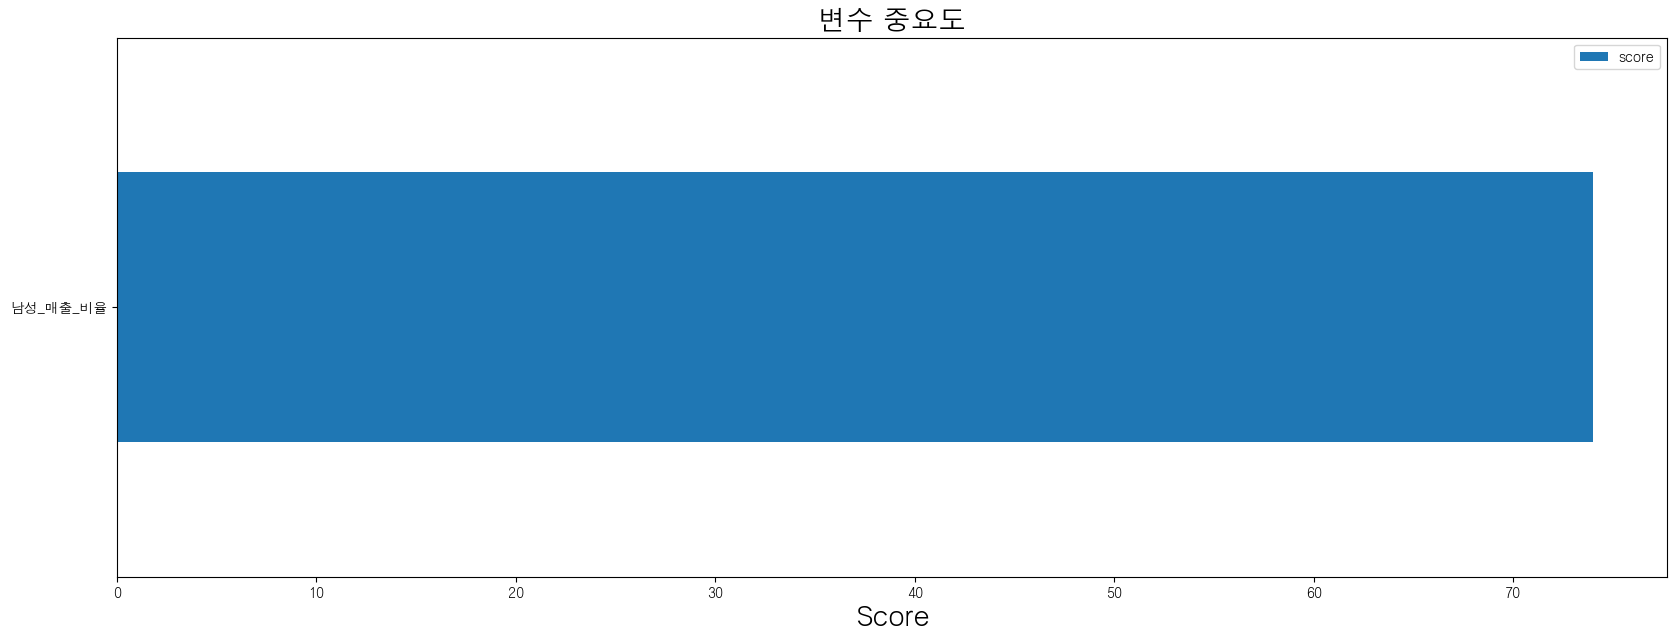

In [47]:
feature_importance(model_survive_1)

#### b. 연령대별 매출

{'연령대_20_매출_비율': 32, '연령대_50_매출_비율': 180, '연령대_10_매출_비율': 8, '연령대_40_매출_비율': 1, '연령대_60_이상_매출_비율': 43, '연령대_30_매출_비율': 1}


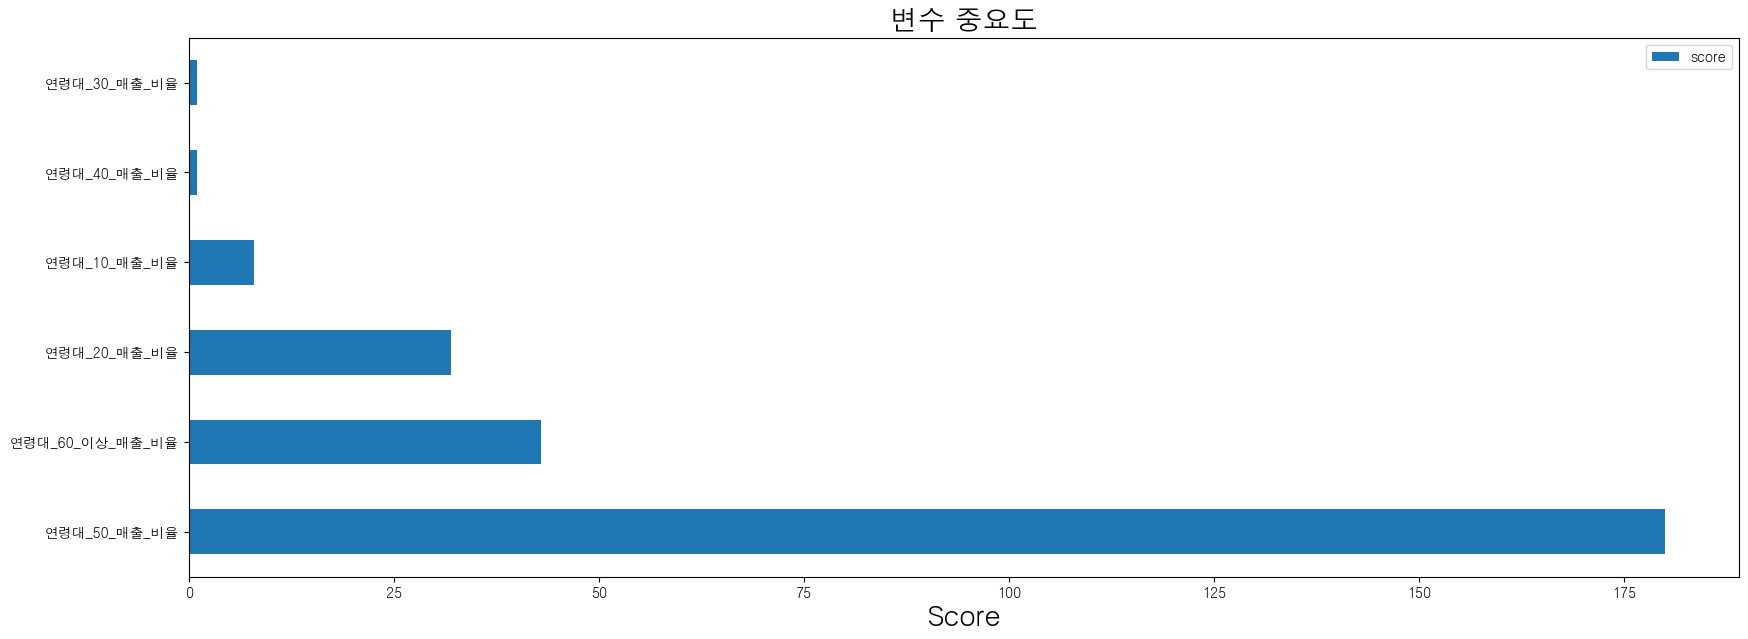

In [48]:
feature_importance(model_survive_2)

#### c. 요일별 매출

{'목요일_매출_비율': 229, '수요일_매출_비율': 15, '토요일_매출_비율': 20, '금요일_매출_비율': 39, '화요일_매출_비율': 1, '월요일_매출_비율': 1, '일요일_매출_비율': 1}


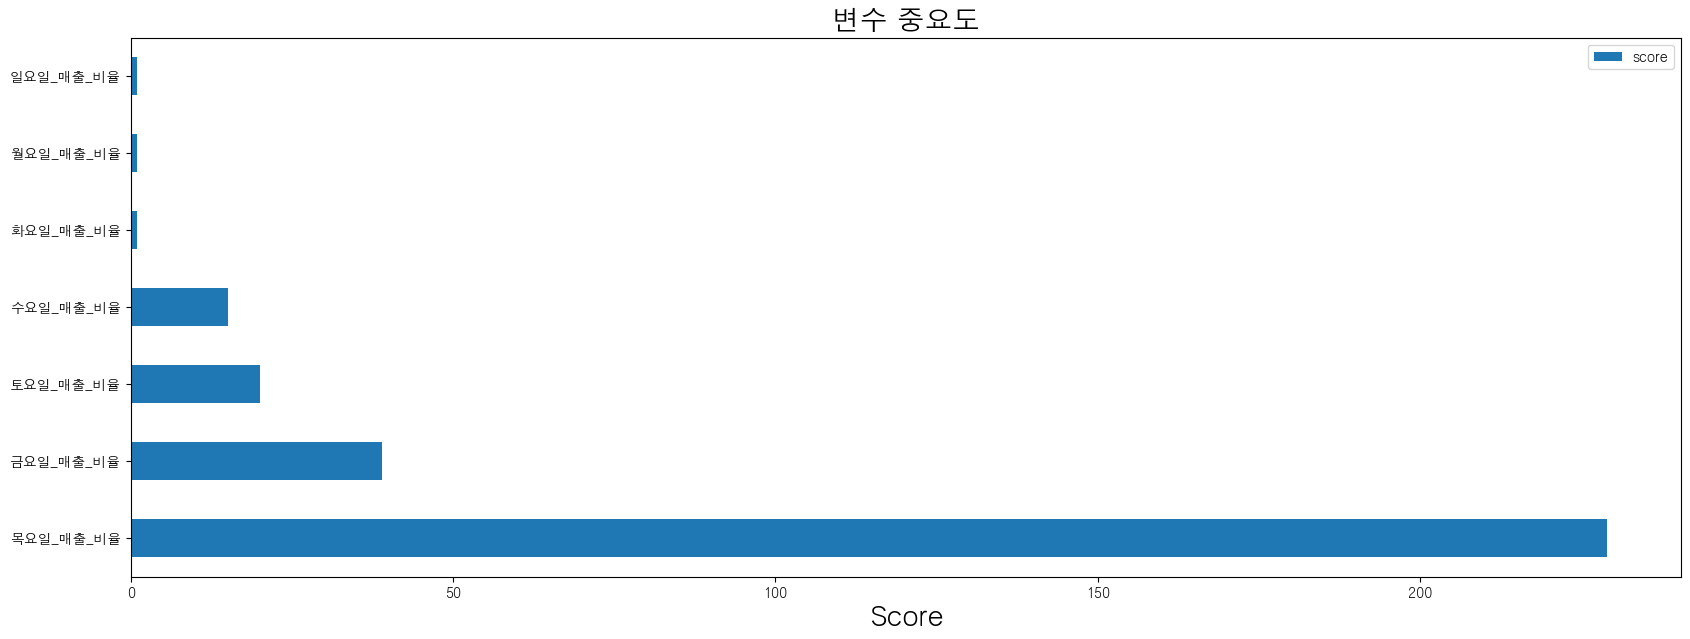

In [49]:
feature_importance(model_survive_3)

#### d. 시간대별 매출

{'시간대_06~11_매출_비율': 203, '시간대_14~17_매출_비율': 114, '시간대_11~14_매출_비율': 12, '시간대_21~24_매출_비율': 9, '시간대_17~21_매출_비율': 6}


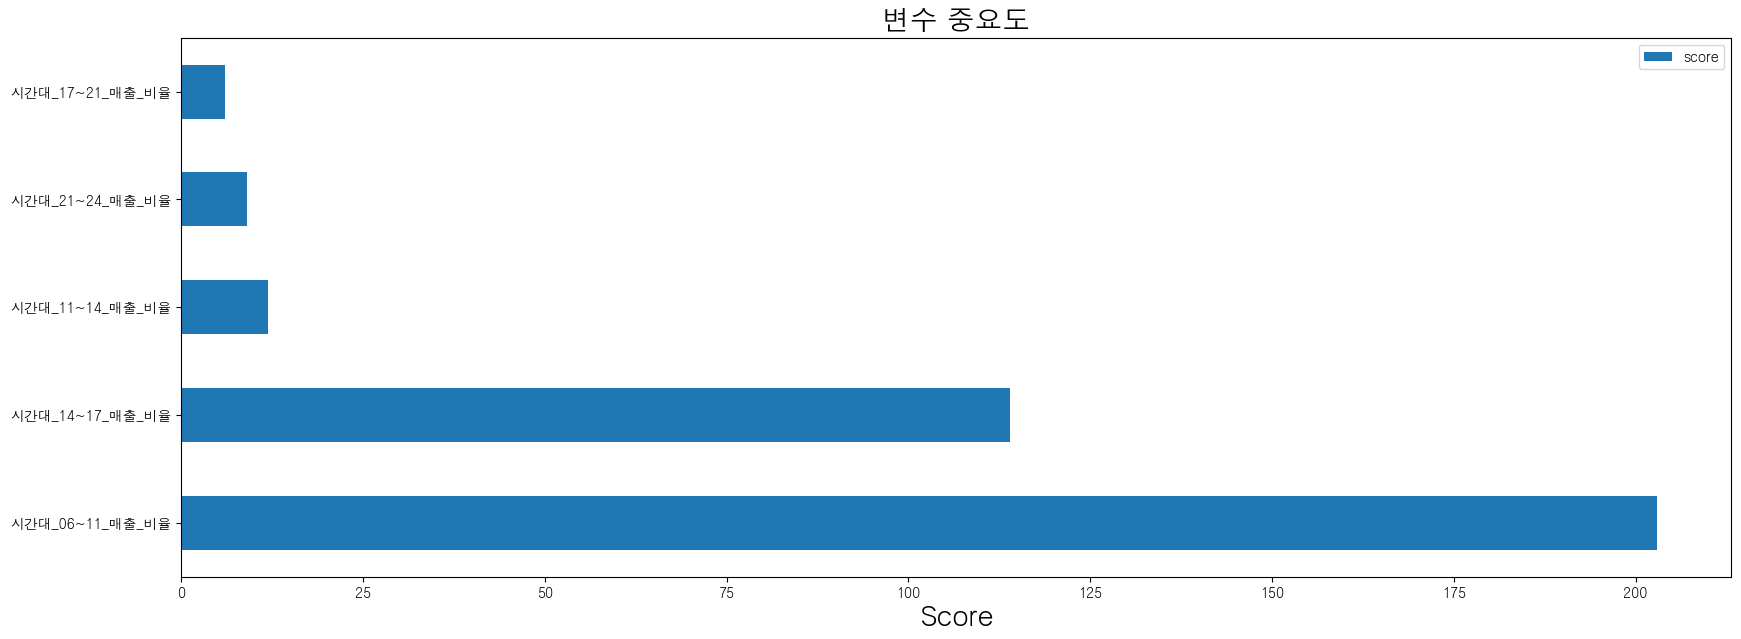

In [50]:
feature_importance(model_survive_4)